






Note to self, if it takes too long to run, then just don't run any of the parts that take too long, unless tweaks are applied to the data preprocessing part. You only need to run it once for the output.

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from xgboost import XGBClassifier
from sklearn.metrics import log_loss

## Part A - Model Variety Training

### Import Dataframe

In [60]:
# Load the dataset from a Folder called Datasets, plaed inside C drive.
df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")
df_raw

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\1256870994.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")


,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### View Unique values for Crimes

In [4]:
unique_desc = df_raw["Crm Cd Desc"].dropna().unique()
len(unique_desc), unique_desc

(140,
 array(['THEFT OF IDENTITY',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'VEHICLE - ATTEMPT STOLEN',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'BATTERY WITH SEXUAL CONTACT',
        'LETTERS, LEWD  -  TELEPHONE

## DataPrep

### Map each Crime commited to a matching Criminal Offense

In [5]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df_raw["Crime_Class"] = df_raw["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df_raw[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [6]:
df_raw['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


Let's start with RAW, unprocesseed model training, then work our way up.

## Category: Machine Learning Models.


### Tree Based: Decision Tree (RAW)

In [7]:
# Remove Crm Cd Desc to avoid leakage
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(X_train, y_train)

# Predict
y_pred_test_1 = dt_model_1.predict(X_test)
y_pred_train_1 = dt_model_1.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Training Set Accuracy: 0.9998877032180846
Testing Set Accuracy: 0.8044630478477469
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999868  0.999983  0.999926  356035.000000
1              0.999982  0.999994  0.999988  163391.000000
2              0.999525  0.999729  0.999627   44202.000000
3              0.999907  0.999317  0.999612   86340.000000
4              1.000000  0.999926  0.999963   13595.000000
5              1.000000  1.000000  1.000000    8282.000000
6              1.000000  1.000000  1.000000   15207.000000
7              1.000000  1.000000  1.000000   13944.000000
8              1.000000  1.000000  1.000000     540.000000
9              1.000000  1.000000  1.000000    1957.000000
accuracy       0.999888  0.999888  0.999888       0.999888
macro avg      0.99

### Tree Based: Random Forest (RAW)

*Without any parameters, this thing will take a while...

In [ ]:
print("=== Random Forest Crime Classification ===")

# Remove Crm Cd Desc to avoid leakage
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, class_names = pd.factorize(df_model["Crime_Class"])

# Convert datetime columns to int timestamps
for col in X.select_dtypes(include=['datetime', 'datetimetz']).columns:
    X[col] = X[col].view('int64')

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize Random Forest with balanced, regularized params
rf_model_1 = RandomForestClassifier()
# Save paraneter tunning for PART B. 

rf_model_1.fit(X_train, y_train)

# Predictions
y_pred_test_1 = rf_model_1.predict(X_test)
y_pred_train_1 = rf_model_1.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("\n=== Performance ===")
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Testing Set Accuracy:  {test_accuracy}")
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")

# Evaluation reports
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

=== Random Forest Crime Classification ===

=== Performance ===
Training Set Accuracy: 0.99987775287032
Testing Set Accuracy:  0.8595944251703163
Overfit Gap:          0.1403
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999935  0.999888  0.999911  355910.000000
1              0.999957  0.999982  0.999969  163441.000000
2              0.999887  0.999320  0.999603   44125.000000
3              0.999410  0.999873  0.999641   86411.000000
4              1.000000  0.999926  0.999963   13602.000000
5              1.000000  0.999880  0.999940    8309.000000
6              1.000000  1.000000  1.000000   15240.000000
7              1.000000  1.000000  1.000000   13984.000000
8              1.000000  1.000000  1.000000     522.000000
9              1.000000  1.000000  1.000000  

### Linear/Probability Based: Logistic Regression (RAW)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ... (Assuming df_raw is already loaded) ...

# 1. Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# 2. Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# 3. Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# 4. Handle missing values
X = X.fillna(X.median())

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6. Scale features 
# (Critically important for Logistic Regression convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# CHANGE: Build Logistic Regression Model (No Parameters)
# ---------------------------------------------------------
lr_model = LogisticRegression() 

# Train model
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_train_1 = lr_model.predict(X_train_scaled)
y_pred_test_1 = lr_model.predict(X_test_scaled)

# Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\won

Training Set Accuracy: 0.788638977217968
Testing Set Accuracy: 0.7878526557390099
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.815145  0.910877  0.860356  356035.000000
1              0.743449  0.870079  0.801795  163391.000000
2              0.426911  0.080607  0.135609   44202.000000
3              0.820808  0.945830  0.878895   86340.000000
4              0.403493  0.067966  0.116336   13595.000000
5              0.000000  0.000000  0.000000    8282.000000
6              0.502550  0.110147  0.180690   15207.000000
7              0.551876  0.035858  0.067340   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.172414  0.005110  0.009926    1957.000000
accuracy       0.788639  0.788639  0.788639       0.788639
macro avg      0.443

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

### Linear/Probability Based: Naive Bayes (RAW)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 1. Clean up leakage columns first to free space immediately
drop_cols = [
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
]
# Only drop if they actually exist in the dataframe
cols_to_drop = [c for c in drop_cols if c in df_raw.columns]
df_model = df_raw.drop(columns=cols_to_drop)

# 2. Separate Target
y, _ = pd.factorize(df_model["Crime_Class"])
X = df_model.drop(columns=["Crime_Class"])

# 3. THE FIX: In-Place Memory Optimized Conversion
# Instead of 'apply' (which clones data), we loop and modify column by column.
# .cat.codes is extremely memory efficient.
print("Converting columns to codes...")
for col in X.columns:
    # Convert to category type first
    X[col] = X[col].astype('category')
    # Extract codes (returns -1 for NaNs)
    X[col] = X[col].cat.codes
    
    # Handle NaNs (-1) by shifting everything up by 1
    # This also ensures no value is 0, which MultinomialNB prefers
    X[col] = X[col] + 1

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Model
# We stick to MultinomialNB because CategoricalNB is the one that wanted 18GB of RAM earlier.
print("Training MultinomialNB...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 6. Evaluate
print("Predicting...")
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy:  {test_accuracy}")
print("-" * 30)
print(classification_report(y_test, y_pred_test))

Converting columns to codes...
Training MultinomialNB...
Predicting...
Training Accuracy: 0.23518073385236243
Testing Accuracy:  0.23543771434636382
------------------------------
              precision    recall  f1-score   support

           0       0.45      0.15      0.23    152409
           1       0.46      0.08      0.13     70096
           2       0.15      0.07      0.10     18834
           3       0.41      0.95      0.57     37105
           4       0.03      0.09      0.04      5836
           5       0.02      0.02      0.02      3588
           6       0.04      0.58      0.08      6564
           7       0.04      0.20      0.07      6033
           8       0.00      0.04      0.00       206
           9       0.00      0.00      0.00       827

    accuracy                           0.24    301498
   macro avg       0.16      0.22      0.12    301498
weighted avg       0.40      0.24      0.23    301498



### Gradient: XGBoost (RAW)

In [ ]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_1 = XGBClassifier()
#    n_estimators=300,
#    learning_rate=0.1,
#    max_depth=6,
#    subsample=0.8,
#    colsample_bytree=0.8,
#    eval_metric="mlogloss",
#    random_state=42
# )

xgb_model_1.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_1.predict(X_train)
y_pred_test = xgb_model_1.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Training Set Accuracy: 0.8717869260959242
Testing Set Accuracy: 0.8623440288161115
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.917569  0.922783  0.920169  356035.000000
1              0.851506  0.959478  0.902273  163391.000000
2              0.701687  0.426248  0.530337   44202.000000
3              0.824993  0.947892  0.882183   86340.000000
4              0.770262  0.443913  0.563229   13595.000000
5              0.755943  0.303308  0.432917    8282.000000
6              0.756248  0.668574  0.709713   15207.000000
7              0.818212  0.523236  0.638292   13944.000000
8              1.000000  0.048148  0.091873     540.000000
9              0.732060  0.646398  0.686567    1957.000000
accuracy       0.871787  0.871787  0.871787       0.871787
macro avg      0.81

## Category: Deep Learning Models



### Neural Networks: CNN

In [55]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_cnn).argmax(axis=1)
y_pred_test = model.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Epoch 1/10


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17588/17588 ━━━━━━━━━━━━━━━━━━━━ 108s 6ms/step - accuracy: 0.8195 - loss: 0.5573 - val_accuracy: 0.8307 - val_loss: 0.5108
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.8284 - loss: 0.5154 - val_accuracy: 0.8336 - val_loss: 0.4956
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 99s 6ms/step - accuracy: 0.8304 - loss: 0.5062 - val_accuracy: 0.8343 - val_loss: 0.4922
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - accuracy: 0.8322 - loss: 0.5006 - val_accuracy: 0.8348 - val_loss: 0.4907
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 107s 6ms/step - accuracy: 0.8328 - loss: 0.4969 - val_accuracy: 0.8367 - val_loss: 0.4868
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 106s 6ms/step - accuracy: 0.8340 - loss: 0.4946 - val_accuracy: 0.8364 - val_loss: 0.4856
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 108s 6ms/step - accuracy: 0.8346 - loss: 0.4928 - val_accuracy: 0.8369 - val_loss: 0.4840
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - accuracy: 0.8346

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.8380126028261831
Testing Set Accuracy: 0.8362907879985937
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.882703  0.914329  0.898238  356035.000000
1              0.802577  0.964447  0.876098  163391.000000
2              0.636438  0.245464  0.354286   44202.000000
3              0.821626  0.945888  0.879389   86340.000000
4              0.765112  0.195513  0.311442   13595.000000
5              0.494340  0.031635  0.059464    8282.000000
6              0.547890  0.402117  0.463820   15207.000000
7              0.744446  0.295611  0.423182   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.617039  0.381196  0.471257    1957.000000
accuracy       0.838013  0.838013  0.838013       0.838013
macro avg      0.63

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

### Neural Network: ANN

In [7]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,              #Use 10 as a derfault value for epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8114 - loss: 0.5778 - val_accuracy: 0.8288 - val_loss: 0.5160
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8234 - loss: 0.5319 - val_accuracy: 0.8312 - val_loss: 0.5036
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8256 - loss: 0.5241 - val_accuracy: 0.8326 - val_loss: 0.5040
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8267 - loss: 0.5202 - val_accuracy: 0.8333 - val_loss: 0.4992
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.8272 - loss: 0.5174 - val_accuracy: 0.8335 - val_loss: 0.4967
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.8281 - loss: 0.5152 - val_accuracy: 0.8336 - val_loss: 0.4970
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.8285 - loss: 0.5138 - val_accuracy: 0.8337 - val_loss: 0.4955
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.8357865678834047
Testing Set Accuracy: 0.8350304147954547
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.882631  0.911174  0.896675  356035.000000
1              0.803602  0.958725  0.874336  163391.000000
2              0.597332  0.265395  0.367507   44202.000000
3              0.821615  0.945819  0.879353   86340.000000
4              0.672763  0.227289  0.339784   13595.000000
5              0.000000  0.000000  0.000000    8282.000000
6              0.549317  0.399553  0.462616   15207.000000
7              0.747830  0.265634  0.392020   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.473761  0.332141  0.390508    1957.000000
accuracy       0.835787  0.835787  0.835787       0.835787
macro avg      0.55

Can be improved? Time to find out.

## Part A - Feature Engineering and Transformation

### Data Cleaning

Check for Duplicates

In [61]:
df_new = df_raw.drop_duplicates()
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


None found.

### Removing Columns 
Do not proceed without caution. In this context, the chosen columns were dropped due to them having a direct relationship to the target class, which may cause a leakage.

In [62]:
df_new = df_new.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233


### Standardization

In this phase, TAKE NOTE that anything, once you hit run, results in the dataframe being permanently changed. So to rerun this segment, you MUST reload and reimport the DataFrame again.

In [63]:
# 1. Clean DATE OCC (mixed formats)
df_new['DATE OCC'] = pd.to_datetime(df_new['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df_new['TIME OCC'] = pd.to_numeric(df_new['TIME OCC'], errors='coerce').astype('Int64')
time_str = df_new['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df_new['DateTime OCC'] = pd.to_datetime(
    df_new['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df_new = df_new.drop(columns=['DATE OCC', 'TIME OCC'])

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,DateTime OCC
0,211507896,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,2020-11-07 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,2020-10-18 18:45:00
2,240913563,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,2020-12-24 13:10:00
4,201418201,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17 16:00:00


### Check for NULL values

In [10]:
df_new.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Leave as NULL, since some records do in fact not possess the given info.

In [64]:
df_new = df_new.drop(columns=[' '])
df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,DateTime OCC
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,2020-11-07 08:45:00
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,2020-10-18 18:45:00
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,2020-10-30 12:40:00
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,2020-12-24 13:10:00
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,2025-02-02 01:30:00
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,2025-02-18 10:00:00
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,2025-01-30 15:54:00
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17 16:00:00


Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

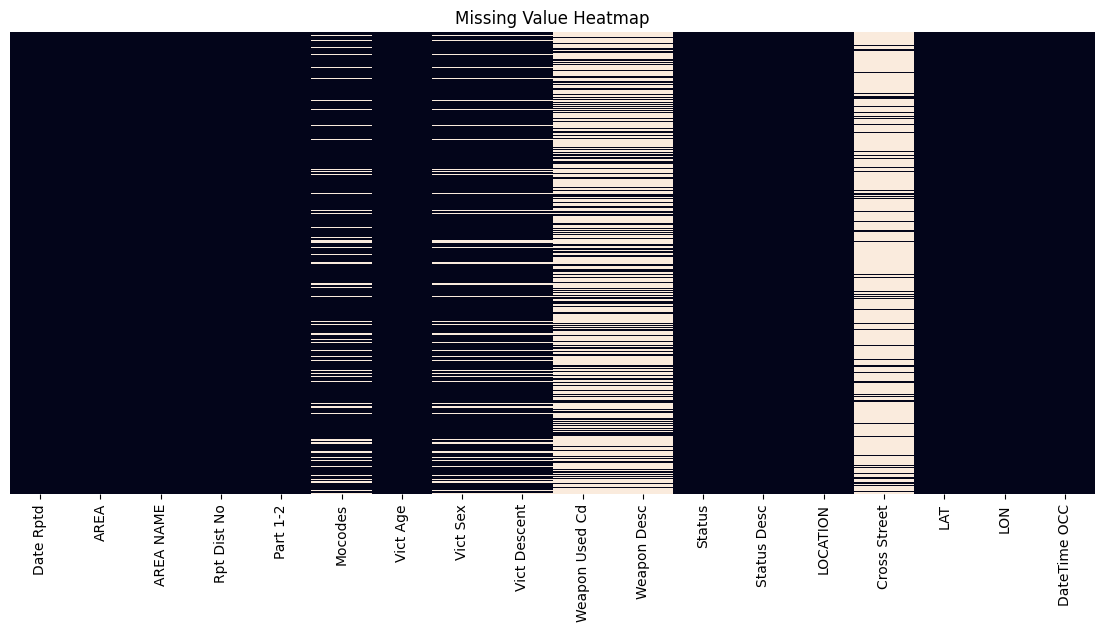

In [65]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

In [67]:
# 1. Drop the Weapon Used Cd column (if it exists)
df_new = df_new.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df_new['Weapon_Present'] = df_new['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df_new = df_new.drop(columns=['Weapon Desc'], errors='ignore')

df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,DateTime OCC,Weapon_Present
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,2020-11-07 08:45:00,Absent
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,2020-10-18 18:45:00,Present
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,2020-10-30 12:40:00,Absent
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,2020-12-24 13:10:00,Absent
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,2025-02-02 01:30:00,Absent
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,2025-02-18 10:00:00,Absent
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,2025-01-30 15:54:00,Absent
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025-01-17 16:00:00,Present


Check again.

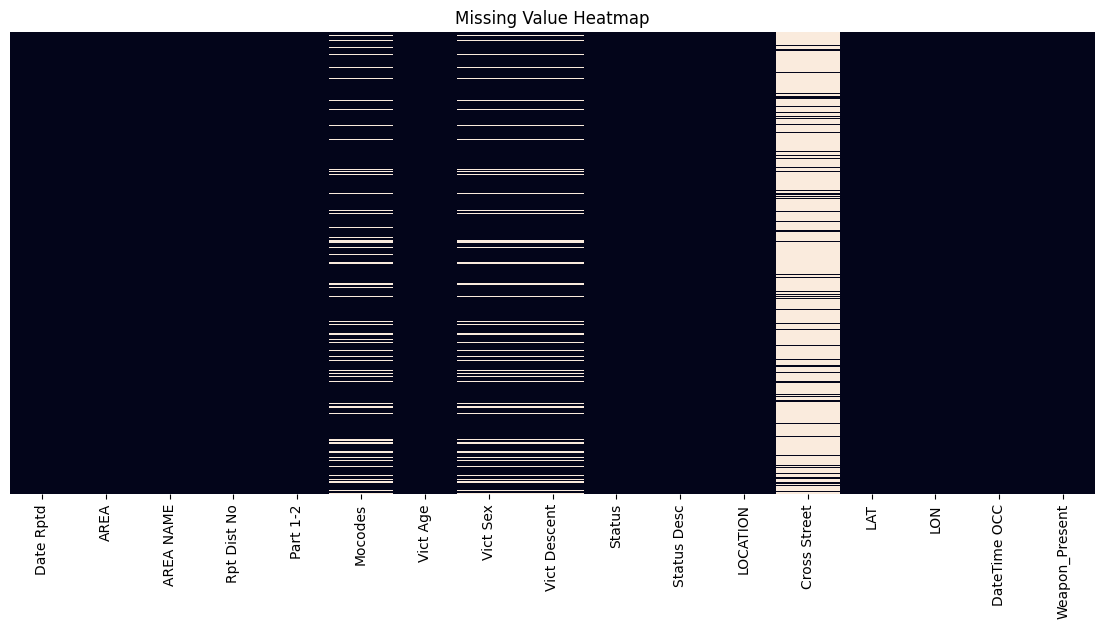

In [68]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

### Dropping columns that provide meaningless value:

Start with obvious ones, Location of the crime will often be unique among all records, but the area/district may not. So it can be dropped.

To do so, apply a test such as Pearson Correlation

Cross Street possess a lot of missing values. This can be dropped completely if Location is already sufficient info.

As for Mo Codes, this is neglectable, since some records may only be a minor offense. So no MO Code may have been recorded.

This applies to victim sex and descent as well, since not all crimes have a victim involved, such as vandalisme.

### Test Pearson Correlation (Numeric Features)


Top 25 strongest Pearson correlations (absolute):
      Feature 1            Feature 2  Correlation
0          AREA          Rpt Dist No     0.999051
18          LAT                  LON    -0.998190
11     Part 1-2             Vict Age     0.206183
17     Vict Age  Crime_Class_numeric    -0.081723
14     Part 1-2  Crime_Class_numeric     0.071209
13     Part 1-2                  LON     0.029212
12     Part 1-2                  LAT    -0.028722
3          AREA                  LAT     0.025338
8   Rpt Dist No                  LAT     0.025077
7   Rpt Dist No             Vict Age     0.022624
2          AREA             Vict Age     0.022593
4          AREA                  LON    -0.010541
9   Rpt Dist No                  LON    -0.010469
1          AREA             Part 1-2     0.007675
6   Rpt Dist No             Part 1-2     0.007489
10  Rpt Dist No  Crime_Class_numeric    -0.003770
5          AREA  Crime_Class_numeric    -0.003678
16     Vict Age                  LON     0.002219


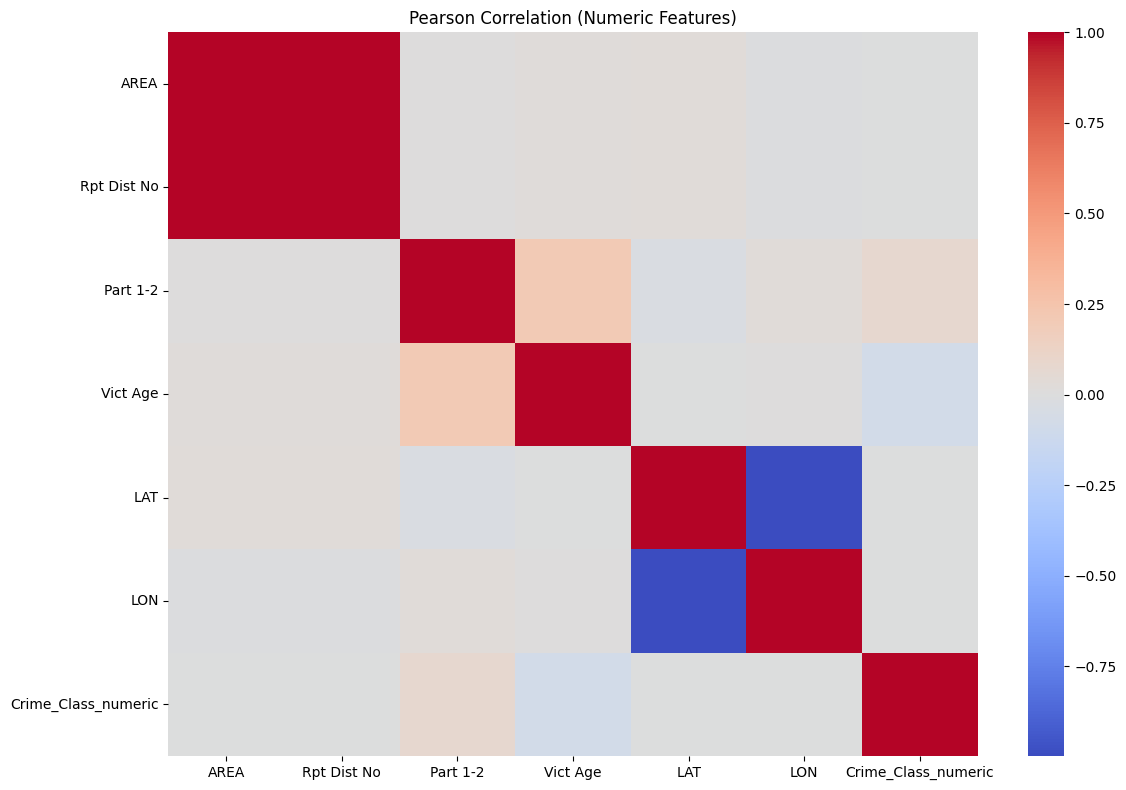

In [14]:
# Choose the DataFrame to analyze; use the most recent processed one if available
try:
    df_corr_source = df_new.copy()
except NameError:
    df_corr_source = df_raw.copy()

# Ensure target encoding (optional): demonstrate correlation against encoded target when present
if 'Crime_Class' in df_corr_source.columns:
    df_corr_source['Crime_Class_numeric'] = df_corr_source['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr_source.select_dtypes(include=['number'])

# Pearson correlation matrix
corr = num_df.corr(numeric_only=True)

# Upper triangle flatten for pairwise sorted report
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_report = (
    upper.stack()
          .reset_index()
          .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

# Show top pairs
print("Top 25 strongest Pearson correlations (absolute):")
print(corr_report.head(25))

# Optional: heatmap for a quick visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Pearson Correlation (Numeric Features)')
plt.tight_layout()
plt.show()

### What can be derived freom this correlation table?

1. Area and Rpt Dist No are inheritelly the same info, if you know the area where the crime occured, is the specific District Number really required?
2. Many features have a correlation near 0, this implies that many features are highly independent. In  which, leave them be.
3. Latitude and Longitude do provide the coordinates of the crime, but neither predicts each other.


In [15]:
# Make a copy of the data
df_corr = df_new.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)


,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1004991 non-null  object        
 1   AREA            1004991 non-null  int64         
 2   AREA NAME       1004991 non-null  object        
 3   Rpt Dist No     1004991 non-null  int64         
 4   Part 1-2        1004991 non-null  int64         
 5   Mocodes         853372 non-null   object        
 6   Vict Age        1004991 non-null  int64         
 7   Vict Sex        860347 non-null   object        
 8   Vict Descent    860335 non-null   object        
 9   Status          1004990 non-null  object        
 10  Status Desc     1004991 non-null  object        
 11  LOCATION        1004991 non-null  object        
 12  Cross Street    154236 non-null   object        
 13  LAT             1004991 non-null  float64       
 14  LON             10

### Let's tackle Mocodes first, these represent a given crime/offense commited. You can find the full list in the file attached.

In [17]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df_new['Mocodes'] = df_new['Mocodes'].fillna('')

# Split by spaces → expand into list
df_new['MOCODES_LIST'] = df_new['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df_new.explode('MOCODES_LIST')

Then, extract all unique MO code entries present.

In [18]:
all_codes = sorted({code for sublist in df_new['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


Count the frequency of each MO Code in the dataset

In [19]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

Select the top 100 MO Codes to keep

In [20]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

Filter MO list into top codes and “others”

In [21]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df_new['MO_OTHERS'] = df_new['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is us

Filter each crime’s MO list to only keep top 100 codes, create an Others column to store everything else.

Multi-hot encode only the top 100 codes

In [22]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df_new.columns if col.startswith("MO_")]
df_new[mo_cols] = df_new[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df_new_1 = df_new.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_0910', 'MO_0302', 'MO_0561', 'MO_0352', 'MO_0421', 'MO_1300', 'MO_1302', 'MO_1906', 'MO_1814', 'MO_0450']


In [23]:
df_new_1 = df_new_1.drop(columns=['Mocodes'], errors='ignore')
df_new_1

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_1309,MO_2032,MO_0701,MO_1813,MO_0329,MO_0209,MO_0429,MO_0100,MO_0602,MO_OTHERS
0,4/11/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
2,12/10/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,1,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


### Next, tackle the location based columns

As mentioned, since all crimes will more times than not, occur in unique, varying locations, it is best to assume that there is no association or pattern to be determined from them. They are simply too specific to be trained upon.

Another key feature that could be dropped is the Date of te Report. Since each report will have its own unique entry date, hence it is safe to assume that the column is noisy and unfeasible in model training.

In [24]:
df_new_1 = df_new_1.drop(columns=['LOCATION', 'Cross Street', 'DateTime OCC', 'Date Rptd'], errors='ignore') #Remove the dates
df_new_1

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,...,MO_1309,MO_2032,MO_0701,MO_1813,MO_0329,MO_0209,MO_0429,MO_0100,MO_0602,MO_OTHERS
0,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,34.2124,...,0,0,0,0,0,0,0,0,0,1
1,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,34.1993,...,0,0,0,0,0,0,0,0,0,0
2,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,34.1847,...,0,0,0,0,0,0,0,0,0,1
3,7,Wilshire,782,1,47,F,A,IC,Invest Cont,34.0339,...,0,0,0,0,0,0,0,0,0,0
4,14,Pacific,1454,1,63,M,H,IC,Invest Cont,33.9813,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,21,Topanga,2103,2,35,M,X,IC,Invest Cont,34.2259,...,0,0,0,0,0,0,0,0,0,0
1004987,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,34.0277,...,0,0,0,0,0,0,0,0,1,1
1004988,13,Newton,1372,2,16,F,H,IC,Invest Cont,33.9942,...,0,0,0,0,0,0,0,0,0,0
1004989,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,34.2450,...,0,0,0,0,0,0,0,0,0,0


### Next, we need to choose bewteen keeping AREA, or DISTRICT.

AREA:
- It encodes neighborhood-level crime patterns
- It’s stable and interpretable

Rpt District:
- This is a finer-grained region ID.
- Usually LAPD districts are ~1–2 square miles.

But using both AREA and Rpt Dist No creates strong multicollinearity, because:
- AREA is a parent region
- Rpt Dist No is the subregion

Which is Better?

Refer back to the correlation test, Rpt District is SLIGHTLY better than AREA, so that is what we will keep. It may contain more info than AREA, as AREA is a bit too general.

In [25]:
df_new_1 = df_new_1.drop(columns=['AREA'])

In [26]:
df_new_1 = df_new_1.drop(columns=['AREA NAME'])
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_1309,MO_2032,MO_0701,MO_1813,MO_0329,MO_0209,MO_0429,MO_0100,MO_0602,MO_OTHERS
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,0,1
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,0,0,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,0,1
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,1,1
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,0


### Finally, we need to decide what to do with LAT and LON

These are very powerful IF transformed.

Raw lat/lon are NOT useful directly because:
- models cannot interpret earth geometry
- correlation is near zero
- linear models especially fail with raw coordinates

Raw latitude and longitude values:
- have no linear meaning
- give almost zero Pearson correlation
- confuse tree models (too many splits)
- confuse linear models (not linear!)
- are extremely sensitive to tiny changes

But crimes happen in spatial hotspots:
- Downtown
- Hollywood
- South LA
- Venice
- San Fernando Valley
- Pico-Union
- Koreatown
- Westlake
- etc.

### Is there a way to make them useful via transformation?

### Clustering the LAT and LON into Bins of range values, may provide much more use.

In [27]:
from sklearn.cluster import KMeans

coords = df_new_1[['LAT', 'LON']].dropna()

kmeans = KMeans(n_clusters=100, random_state=42)

df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\2141477543.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)


### Method 1 — KMeans Clustering

This learns 50–200 “crime regions” directly from the data.

In [28]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_2032,MO_0701,MO_1813,MO_0329,MO_0209,MO_0429,MO_0100,MO_0602,MO_OTHERS,Location_Cluster
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,1,71
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,0,0,57
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,1,27
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,33
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,1,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,53
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,1,1,93
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,8
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,44


### Method 2 — Spatial Binning (ranges)

This converts lat/lon into a grid.

In [29]:
df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\536423381.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\536423381.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


In [30]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_1813,MO_0329,MO_0209,MO_0429,MO_0100,MO_0602,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,1,71,49,0
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,57,49,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,1,27,49,0
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,33,49,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,6,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,53,49,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,1,1,93,49,0
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,8,49,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,44,49,0


This creates 2 features:
- Lat_bin
- Lon_bin

Which together form a 2D grid, like “Region (12, 34)”.

This is good for:
- linear models
- tree models
- giant datasets
- preserving spatial structure

### 🟢 Combining Both Is Even Better

Crime prediction systems often use:

✔ Location_Cluster (KMeans)

✔ Lat_bin + Lon_bin (50x50 grid)

This gives:
- global structure (clusters)
- local structure (grid bins)
- Without storing raw LAT/LON.

#### Function for Plotting Confusion Matrix. You'll be using this later, so intialize it first.

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_crime_matrix(y_test, y_pred, model_name="Model", labels=None):
    """
    Plots a confusion matrix with counts and percentages.
    """
    # Compute matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages for the heatmap annotations
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', 
                xticklabels=labels if labels is not None else "auto",
                yticklabels=labels if labels is not None else "auto")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Crime Class')
    plt.xlabel('Predicted Crime Class')
    plt.show()

## Part A - Remodelling with Processing

Now, let's try building the Models again.

### Tree-Based: Decision Tree (Processed)

In [57]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test_dt = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_3 = DecisionTreeClassifier()
dt_model_3.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model_3.predict(X_test)
y_pred_train = dt_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_dt, y_pred_dt, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test_dt, y_pred_dt)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.9819514906331691
Testing Set Accuracy: 0.8778797869305932
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.987960  0.976778  0.982337  356035.000000
1              0.999951  0.999988  0.999969  163391.000000
2              0.997842  0.994005  0.995920   44202.000000
3              0.908648  0.953081  0.930334   86340.000000
4              0.999779  0.999559  0.999669   13595.000000
5              0.999033  0.998310  0.998671    8282.000000
6              0.999605  0.999408  0.999507   15207.000000
7              0.995265  0.994908  0.995087   13944.000000
8              1.000000  0.981481  0.990654     540.000000
9              1.000000  0.999489  0.999744    1957.000000
accuracy       0.981951  0.981951  0.981951       0.981951
macro avg      0.98

A highly Noticeable increase.

Now, let's plot the Error vs Complexity curve.

This first one shall use a stratified sampling approach.

------------------------
Decision Tree Log Loss
------------------------
Training Loss:
0.035924803261684214
------------------------
Testing Loss:
3.781626026350509
------------------------
Accuracy Gap (Train - Test):
0.1043071944852676
------------------------
Loss Gap (Test - Train):
3.7457012230888247
------------------------


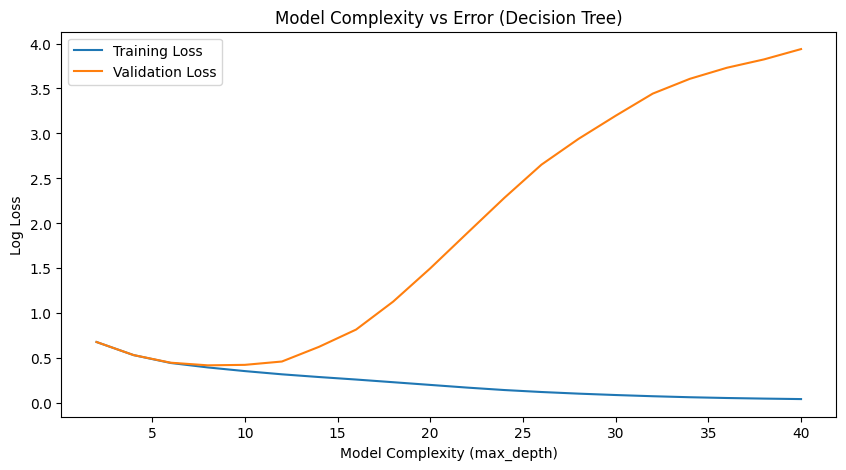

In [43]:
from sklearn.metrics import log_loss
from sklearn.model_selection import validation_curve
import numpy as np

# Compute log-loss for Decision Tree
train_loss = log_loss(y_train, dt_model_3.predict_proba(X_train))
test_loss  = log_loss(y_test,  dt_model_3.predict_proba(X_test))

print("------------------------")
print("Decision Tree Log Loss")
print("------------------------")
print("Training Loss:")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")

# Gap analysis
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss

print("Accuracy Gap (Train - Test):")
print(acc_gap)
print("------------------------")
print("Loss Gap (Test - Train):")
print(loss_gap)
print("------------------------")


# ================================
# 1. FAST STRATIFIED SUBSAMPLING
# ================================
from sklearn.model_selection import train_test_split
import numpy as np

# Take only 5% of the data (tweak 0.05 → 0.02 or 0.01 if still slow)
sample_ratio = 0.25  
X_small, _, y_small, _ = train_test_split(
    X, y, 
    train_size=sample_ratio, 
    stratify=y,
    random_state=42
)

# Split the small subset into train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small,
    test_size=0.3,
    stratify=y_small,
    random_state=42
)

# ==================================
# 2. MODEL COMPLEXITY VS ERROR
# ==================================
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)

    # Fit on *small* dataset
    model.fit(X_train_s, y_train_s)

    # Probabilities
    train_proba = model.predict_proba(X_train_s)
    test_proba  = model.predict_proba(X_test_s)

    # Loss
    train_losses_curve.append(log_loss(y_train_s, train_proba))
    test_losses_curve.append(log_loss(y_test_s, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_s)
    y_test_pred  = model.predict(X_test_s)

    train_acc_curve.append(accuracy_score(y_train_s, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_s, y_test_pred))

# ================================
# 3. PLOT
# ================================
plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()




The second one will use all rows present.

=== Generating Decision Tree Log-Loss vs Complexity Curve ===
Training Decision Tree with max_depth=5
Training Decision Tree with max_depth=10
Training Decision Tree with max_depth=15
Training Decision Tree with max_depth=20
Training Decision Tree with max_depth=25
Training Decision Tree with max_depth=30
Training Decision Tree with max_depth=35
Training Decision Tree with max_depth=None


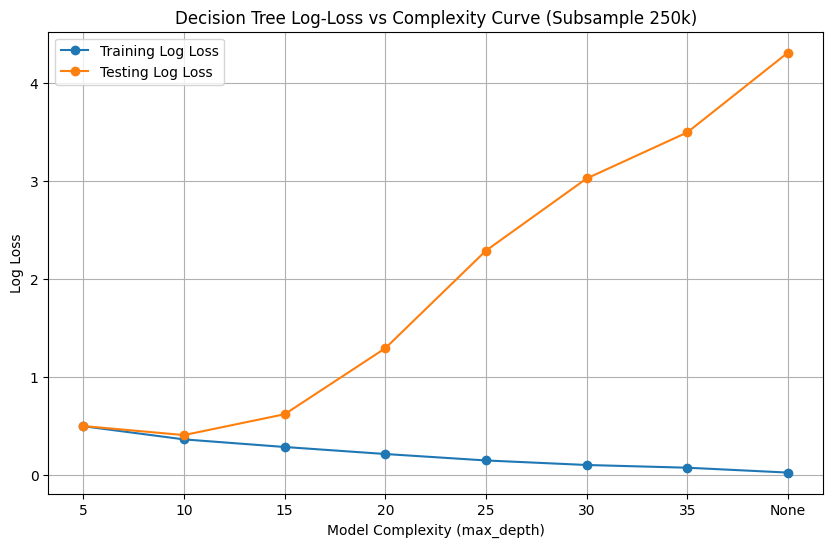

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# ----------------------------------------------------
# Convert y → Series so we can subsample safely
# ----------------------------------------------------
y_train = pd.Series(y_train).reset_index(drop=True)
y_test  = pd.Series(y_test).reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

# ----------------------------------------------------
# Subsample 250k rows for faster computation
# ----------------------------------------------------
sample_size = min(250_000, len(X_train), len(X_test))

X_train_sub = X_train.sample(sample_size, random_state=42)
y_train_sub = y_train.loc[X_train_sub.index]

X_test_sub = X_test.sample(sample_size, random_state=42)
y_test_sub = y_test.loc[X_test_sub.index]

# ----------------------------------------------------
# Complexity levels (same as original)
# ----------------------------------------------------
complexity_values = [5, 10, 15, 20, 25, 30, 35, None]

train_losses = []
test_losses = []

print("=== Generating Decision Tree Log-Loss vs Complexity Curve ===")

for depth in complexity_values:
    print(f"Training Decision Tree with max_depth={depth}")

    dt_model = DecisionTreeClassifier(
        max_depth=depth,
        random_state=42  # no tuning params, just default DT
    )
    
    dt_model.fit(X_train_sub, y_train_sub)

    # Predict probs so we can compute log-loss
    train_proba = dt_model.predict_proba(X_train_sub)
    test_proba  = dt_model.predict_proba(X_test_sub)

    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_test_sub, test_proba))

# ----------------------------------------------------
# PLOT
# ----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in complexity_values], train_losses, marker='o', label="Training Log Loss")
plt.plot([str(d) for d in complexity_values], test_losses, marker='o', label="Testing Log Loss")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Decision Tree Log-Loss vs Complexity Curve (Subsample 250k)")
plt.legend()
plt.grid(True)
plt.show()



### Evaluate Feature Importance (Decision Tree)

In [38]:
importance = dt_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

,feature,importance
9,Weapon_Present,0.321551
4,Vict Descent,0.197123
43,MO_0344,0.055075
86,MO_2038,0.048558
8,LON,0.037714
7,LAT,0.037556
2,Vict Age,0.031951
1,Part 1-2,0.025305
0,Rpt Dist No,0.024089
42,MO_0329,0.018477


### Perform Shuffle Split Validation to verify the results.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import numpy as np

print("=== Decision Tree Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    dt_model = DecisionTreeClassifier(
        max_depth=6,      # similar to XGB's depth, tweak as needed
        random_state=42
    )

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



=== Decision Tree Cross-Validation: Stratified Shuffle-Split ===
Fold 1: Accuracy = 0.8689
Fold 2: Accuracy = 0.8683
Fold 3: Accuracy = 0.8684
Fold 4: Accuracy = 0.8691
Fold 5: Accuracy = 0.8697
---------------------------------------------------------
Mean Accuracy:   0.8688641384022449
Std Deviation:  0.0005276165283623211
---------------------------------------------------------


Confusion Matrix:

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\4016707288.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


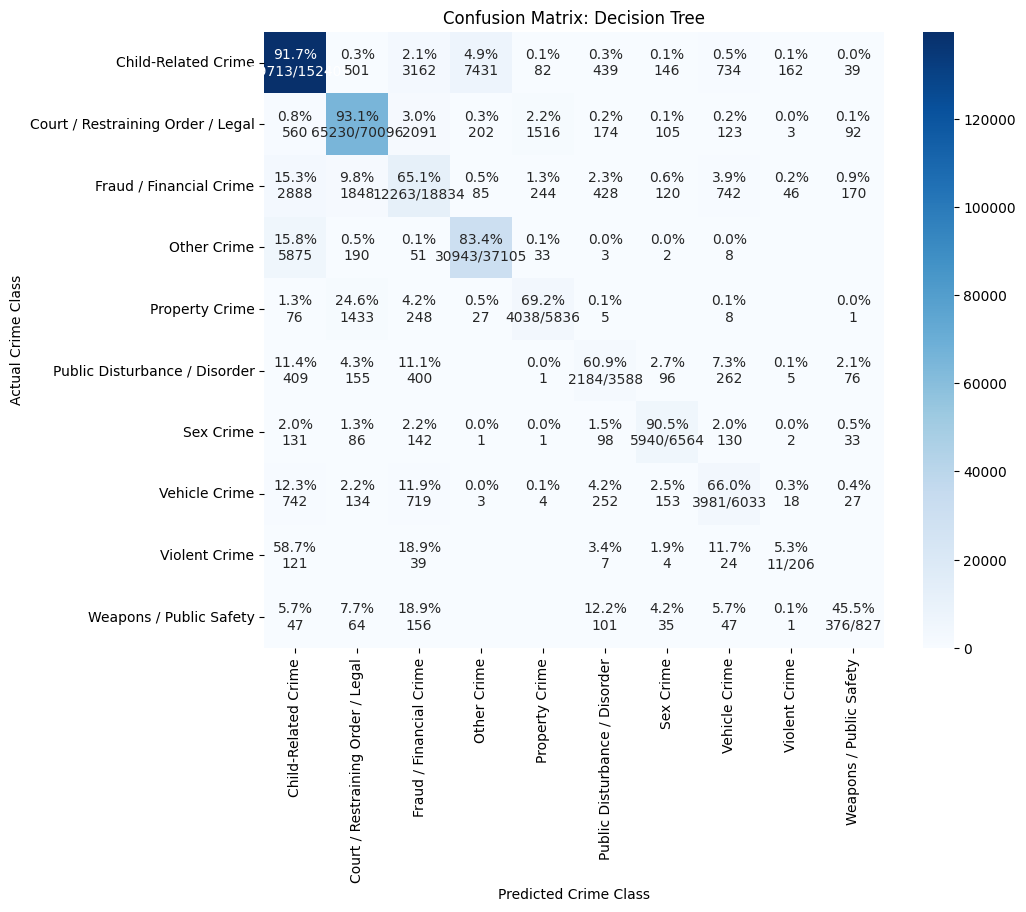

In [58]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_dt, y_pred_dt, model_name="Decision Tree", labels=crime_labels)

### Tree-Based: Random Forest (Processed)

*Yawn...

In [55]:
print("=== Random Forest Crime Classification (PROCESSED) ===")

# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill any remaining NaN values before training
X = X.fillna(-1)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test_rf = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model (Correctly named rf_model_3)
rf_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_3.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model_3.predict(X_test)
y_pred_train_rf = rf_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_rf, y_pred_rf, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_rf, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
test_accuracy = accuracy_score(y_test_rf, y_pred_rf)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

=== Random Forest Crime Classification (PROCESSED) ===
Training Set Accuracy: 0.98190458185085
Testing Set Accuracy: 0.9111868072093348
Overfit Gap:          0.0707
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.994604  0.970063  0.982180  355910.000000
1              0.999920  0.999969  0.999945  163441.000000
2              0.997113  0.994108  0.995608   44125.000000
3              0.888751  0.979898  0.932102   86411.000000
4              0.999779  0.999485  0.999632   13602.000000
5              0.998315  0.998435  0.998375    8309.000000
6              0.999672  0.999409  0.999541   15240.000000
7              0.993166  0.997640  0.995398   13984.000000
8              1.000000  0.978927  0.989351     522.000000
9              1.000000  1.000000  1.000000    1949.000

A respectful increment.

### Now, let's validate the results:

Since RF is a very complex and time consuming ML, we'll need to use alternatie validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [33]:
from sklearn.model_selection import StratifiedKFold

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")


Fold 1: Accuracy = 0.9009
Fold 2: Accuracy = 0.8978
Fold 3: Accuracy = 0.8997
Fold 4: Accuracy = 0.9006
Fold 5: Accuracy = 0.9035
---------------------------------------------------------
K-Fold CV Accuracy Mean: 0.9004999999999999
Std: 0.0018801595676962873
---------------------------------------------------------


Method 2: Use Stratified Shuffle-Split

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== Random Forest Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


=== Random Forest Cross-Validation: Stratified Shuffle-Split ===
Fold 1: Accuracy = 0.9113
Fold 2: Accuracy = 0.9112
Fold 3: Accuracy = 0.9116
Fold 4: Accuracy = 0.9111
Fold 5: Accuracy = 0.9116
---------------------------------------------------------
Mean Accuracy:   0.9113340718678067
Std Deviation:  0.00021243501266089178
---------------------------------------------------------


Plot the error versus complexity curve:

=== Subsampling Training Data ===
Training data reduced to: 100000 samples
=== Generating Error vs Complexity (Max Depth) Curve ===
Training model with max_depth=1
Training model with max_depth=2
Training model with max_depth=3
Training model with max_depth=4
Training model with max_depth=5
Training model with max_depth=6
Training model with max_depth=7
Training model with max_depth=8
Training model with max_depth=9
Training model with max_depth=10
Training model with max_depth=11
Training model with max_depth=12
Training model with max_depth=13
Training model with max_depth=14
Training model with max_depth=15
Training model with max_depth=16
Training model with max_depth=17
Training model with max_depth=18
Training model with max_depth=19
Training model with max_depth=20
Training model with max_depth=21
Training model with max_depth=22
Training model with max_depth=23
Training model with max_depth=24
Training model with max_depth=25
Training model with max_depth=26
Training model with

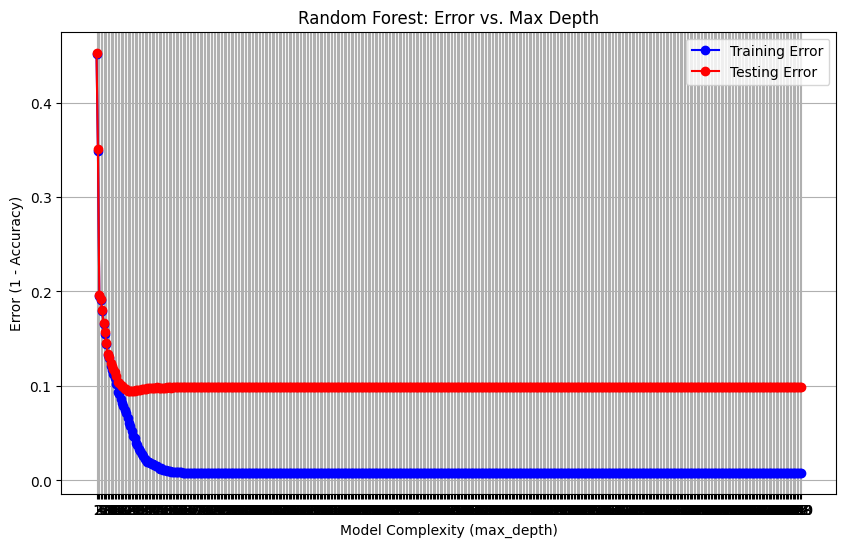

In [35]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# --- 1. Subsample the data to 250k ---
print("=== Subsampling Training Data ===")
# We verify we have enough data, then sample 250k without replacement
n_samples = min(100000, len(X_train))
X_train_sub, y_train_sub = resample(
    X_train, y_train, 
    n_samples=n_samples, 
    replace=False, 
    random_state=42
)
print(f"Training data reduced to: {X_train_sub.shape[0]} samples")

# --- 2. Define Depth Range (Complexity) ---
# We range from depth 1 (very simple) to 25 (very complex)
depth_settings = range(1, 501) #Adjust to larger value range if needed

train_errors = []
test_errors = []

print("=== Generating Error vs Complexity (Max Depth) Curve ===")

for d in depth_settings:
    print(f"Training model with max_depth={d}")

    rf = RandomForestClassifier(
        n_estimators=50,  # Fixed: We isolate depth as the variable
        max_depth=d,      # Variable: This controls complexity
        random_state=42,
        n_jobs=-1
    )
    
    # Fit on the subsampled data
    rf.fit(X_train_sub, y_train_sub)

    # Predict
    train_pred = rf.predict(X_train_sub)
    test_pred  = rf.predict(X_test)

    # Compute error (1 - accuracy)
    train_err = 1 - accuracy_score(y_train_sub, train_pred)
    test_err  = 1 - accuracy_score(y_test, test_pred)

    train_errors.append(train_err)
    test_errors.append(test_err)

# --- 3. Plot ---
plt.figure(figsize=(10, 6))

# Plotting the curves
plt.plot(depth_settings, train_errors, marker='o', label="Training Error", color='blue')
plt.plot(depth_settings, test_errors, marker='o', label="Testing Error", color='red')

# Formatting
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Random Forest: Error vs. Max Depth")
plt.xticks(depth_settings) # Ensure we see all depth ticks
plt.legend()
plt.grid(True)

plt.show()




 ### Evaluate Feature Importance (Random Forest)

In [36]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = rf_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


,feature,importance
9,Weapon_Present,0.184393
4,Vict Descent,0.077533
3,Vict Sex,0.065048
62,MO_0344,0.060129
15,MO_0416,0.048800
2,Vict Age,0.048088
8,LON,0.041526
7,LAT,0.041087
1,Part 1-2,0.034502
39,MO_0913,0.028799


Confusion Matrix:

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\4016707288.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


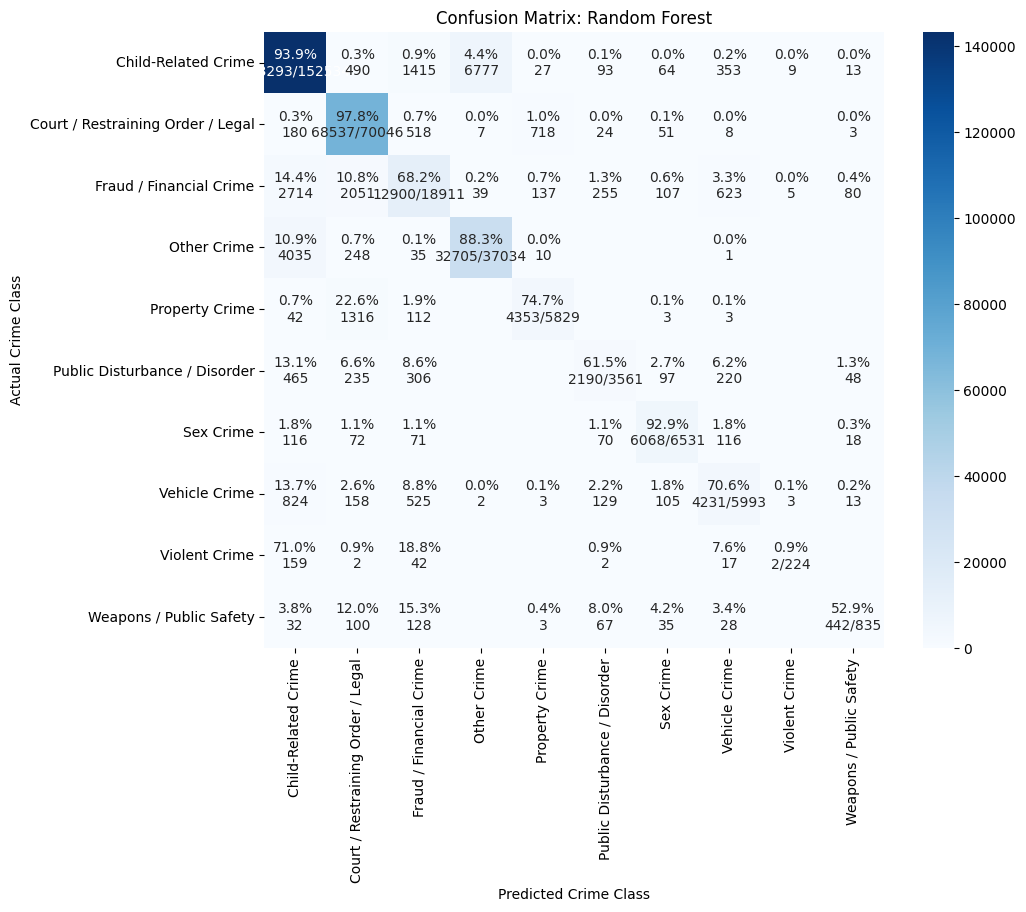

In [56]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_rf, y_pred_rf, model_name="Random Forest", labels=crime_labels)

### Probabilistic: Logistic Regression (Processed)

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64 (if any exist)
# Using 'view' on datetimes is fast and memory efficient
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
# (Necessary because lists are not hashable and break many functions)
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (The "Pro" way to avoid MemoryError)
# We loop instead of using .apply() to save RAM
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# Logistic Regression cannot handle NaNs. 
# Since we used cat.codes, NaNs are already -1, but we ensure everything is numeric.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_lr = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# Logistic Regression works best when features are on the same scale (e.g., -1 to 1)
print("Scaling data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Logistic Regression Model
print("Training Logistic Regression...")
lr_model_1 = LogisticRegression() # Default parameters

# Train model
lr_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = lr_model_1.predict(X_train_scaled)
y_pred_test_lr = lr_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_lr, y_pred_test_lr, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_lr, y_pred_test_lr)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data...
Training Logistic Regression...


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicting...
Training Set Accuracy: 0.8994830083597136
Testing Set Accuracy: 0.8982978328214449
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.933845  0.935852  0.934847  356035.000000
1              0.921360  0.962807  0.941628  163391.000000
2              0.819256  0.529953  0.643588   44202.000000
3              0.815259  0.950880  0.877862   86340.000000
4              0.745560  0.700919  0.722551   13595.000000
5              0.834315  0.513161  0.635467    8282.000000
6              0.946154  0.905899  0.925589   15207.000000
7              0.647402  0.605709  0.625861   13944.000000
8              0.500000  0.003704  0.007353     540.000000
9              0.634500  0.379663  0.475064    1957.000000
accuracy       0.899483  0.899483  0.899483       0.899483
macro

### Probabilistic: Naive Bayes (Processed)

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # <--- Changed from StandardScaler
from sklearn.naive_bayes import MultinomialNB   # <--- The Model
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (Using cat.codes for memory efficiency)
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# We stick to your logic, but Naive Bayes hates -1.
# We will fix the -1s in the Scaling step below.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# CRITICAL CHANGE: MultinomialNB fails with negative numbers.
# StandardScaler produces negatives. MinMaxScaler (0, 1) fixes this.
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Naive Bayes Model
print("Training Multinomial Naive Bayes...")
nb_model_1 = MultinomialNB() 

# Train model
nb_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data (MinMax)...
Training Multinomial Naive Bayes...
Predicting...
Training Set Accuracy: 0.871889272530075
Testing Set Accuracy: 0.8713689643049042
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.935642  0.916253  0.925846  356035.000000
1              0.886901  0.902675  0.894719  163391.000000
2              0.672489  0.514750  0.583141   44202.000000
3              0.822126  0.945321  0.879430   86340.000000
4              0.502667  0.630747  0.559470   13595.000000
5              0.778507  0.501207  0.609813    8282.000000
6              0.903444  0.895246  0.899326   15207.000000
7              0.534854  0.595382  0.563497   13944.000000
8              0.085106  0.022222  0.035242     540.000000
9              0.275608  0.324476  0.298052

Perform Shuffle-Split Validation for both LR anmd NB models:

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the Splitter (Same for both)
# 5 Splits is a good balance between speed and reliability
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

print("=========================================================")
print("1. Logistic Regression Validation (StandardScaler)")
print("=========================================================")

lr_accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data (Memory efficient indexing)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (Critical: Fit on Train, Transform Test)
    # StandardScaler is best for Logistic Regression speed/convergence
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Train (n_jobs=-1 uses all CPU cores for speed)
    lr = LogisticRegression(n_jobs=-1) 
    lr.fit(X_train_scaled, y_train)

    # 4. Score
    acc = accuracy_score(y_test, lr.predict(X_test_scaled))
    
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    lr_accuracies.append(acc)
    fold += 1

print(f"LR Mean Accuracy:  {np.mean(lr_accuracies):.4f}")
print(f"LR Std Deviation:  {np.std(lr_accuracies):.4f}")


print("\n=========================================================")
print("2. Multinomial Naive Bayes Validation (MinMaxScaler)")
print("=========================================================")

nb_accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (MinMaxScaler is REQUIRED for NB to avoid negative errors)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Train
    nb = MultinomialNB()
    nb.fit(X_train_scaled, y_train)

    # 4. Score
    acc = accuracy_score(y_test, nb.predict(X_test_scaled))

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    nb_accuracies.append(acc)
    fold += 1

print(f"NB Mean Accuracy:  {np.mean(nb_accuracies):.4f}")
print(f"NB Std Deviation:  {np.std(nb_accuracies):.4f}")
print("---------------------------------------------------------")

1. Logistic Regression Validation (StandardScaler)
Fold 1: Accuracy = 0.8992
Fold 2: Accuracy = 0.8990
Fold 3: Accuracy = 0.8989
Fold 4: Accuracy = 0.8983
Fold 5: Accuracy = 0.8993
LR Mean Accuracy:  0.8989
LR Std Deviation:  0.0004

2. Multinomial Naive Bayes Validation (MinMaxScaler)
Fold 1: Accuracy = 0.8724
Fold 2: Accuracy = 0.8718
Fold 3: Accuracy = 0.8727
Fold 4: Accuracy = 0.8713
Fold 5: Accuracy = 0.8723
NB Mean Accuracy:  0.8721
NB Std Deviation:  0.0005
---------------------------------------------------------


Plot the error vs complexity curve

Subsampling 250k rows...
Computing LR Complexity Curve...
Computing NB Complexity Curve...


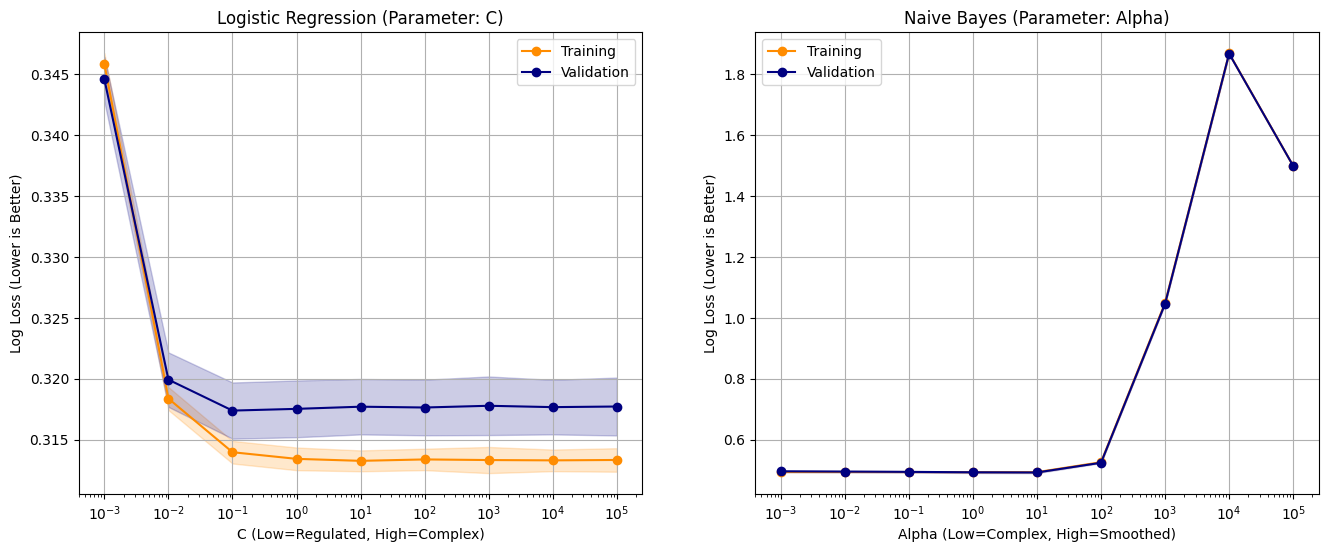

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import validation_curve, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# ==========================================
# 1. Prepare Data (250K Subsample)
# ==========================================
print("Subsampling 250k rows...")
# Sample first to save time on preprocessing
df_sub = df_new_1.sample(n=250000, random_state=42).copy()

# Clean up leakage columns
drop_cols = [
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Crime_Class"
]
cols_to_drop = [c for c in drop_cols if c in df_sub.columns]

# Prepare X and y
y, _ = pd.factorize(df_sub["Crime_Class"])
X = df_sub.drop(columns=cols_to_drop) # Drop target + leakage

# --- Preprocessing (Optimized) ---
# 1. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# 2. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# 3. Factorize Objects (cat.codes)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# 4. Handle NaNs/Negatives
# Logistic Regression handles -1 fine (as a number), 
# but NB needs positive. We'll rely on MinMaxScaler for NB later.
X = X.fillna(-1)

# ==========================================
# 2. Setup Models & Validation
# ==========================================

# Splitter: 3 splits is enough for a curve plot (saves time vs 5)
cv_split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

# Pipeline 1: Logistic Regression (Standard Scaler)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, n_jobs=-1))
])
# Test C from 0.001 (Simple) to 100 (Complex)
param_range_lr = np.logspace(-3, 5, 9) 

# Pipeline 2: Naive Bayes (MinMax Scaler)
pipe_nb = Pipeline([
    ('scaler', MinMaxScaler()), # Fixes negative numbers for NB
    ('nb', MultinomialNB())
])
# Test Alpha from 0.001 (Complex) to 100 (Simple)
param_range_nb = np.logspace(-3, 5, 9) 

# ==========================================
# 3. Compute Curves
# ==========================================
print("Computing LR Complexity Curve...")
train_scores_lr, test_scores_lr = validation_curve(
    pipe_lr, X, y, 
    param_name="lr__C", 
    param_range=param_range_lr,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

print("Computing NB Complexity Curve...")
train_scores_nb, test_scores_nb = validation_curve(
    pipe_nb, X, y, 
    param_name="nb__alpha", 
    param_range=param_range_nb,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

# Helper to process scores (flip sign for Log Loss)
def process_scores(scores):
    return -np.mean(scores, axis=1), np.std(scores, axis=1)

train_mean_lr, train_std_lr = process_scores(train_scores_lr)
test_mean_lr, test_std_lr = process_scores(test_scores_lr)
train_mean_nb, train_std_nb = process_scores(train_scores_nb)
test_mean_nb, test_std_nb = process_scores(test_scores_nb)

# ==========================================
# 4. Plotting
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LR Plot
axes[0].plot(param_range_lr, train_mean_lr, label="Training", color="darkorange", marker='o')
axes[0].plot(param_range_lr, test_mean_lr, label="Validation", color="navy", marker='o')
axes[0].fill_between(param_range_lr, train_mean_lr - train_std_lr, train_mean_lr + train_std_lr, alpha=0.2, color="darkorange")
axes[0].fill_between(param_range_lr, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, alpha=0.2, color="navy")
axes[0].set_title("Logistic Regression (Parameter: C)")
axes[0].set_xlabel("C (Low=Regulated, High=Complex)")
axes[0].set_ylabel("Log Loss (Lower is Better)")
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True)

# NB Plot
axes[1].plot(param_range_nb, train_mean_nb, label="Training", color="darkorange", marker='o')
axes[1].plot(param_range_nb, test_mean_nb, label="Validation", color="navy", marker='o')
axes[1].fill_between(param_range_nb, train_mean_nb - train_std_nb, train_mean_nb + train_std_nb, alpha=0.2, color="darkorange")
axes[1].fill_between(param_range_nb, test_mean_nb - test_std_nb, test_mean_nb + test_std_nb, alpha=0.2, color="navy")
axes[1].set_title("Naive Bayes (Parameter: Alpha)")
axes[1].set_xlabel("Alpha (Low=Complex, High=Smoothed)")
axes[1].set_ylabel("Log Loss (Lower is Better)")
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True)

plt.show()

Confusion Matrix:

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\4016707288.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


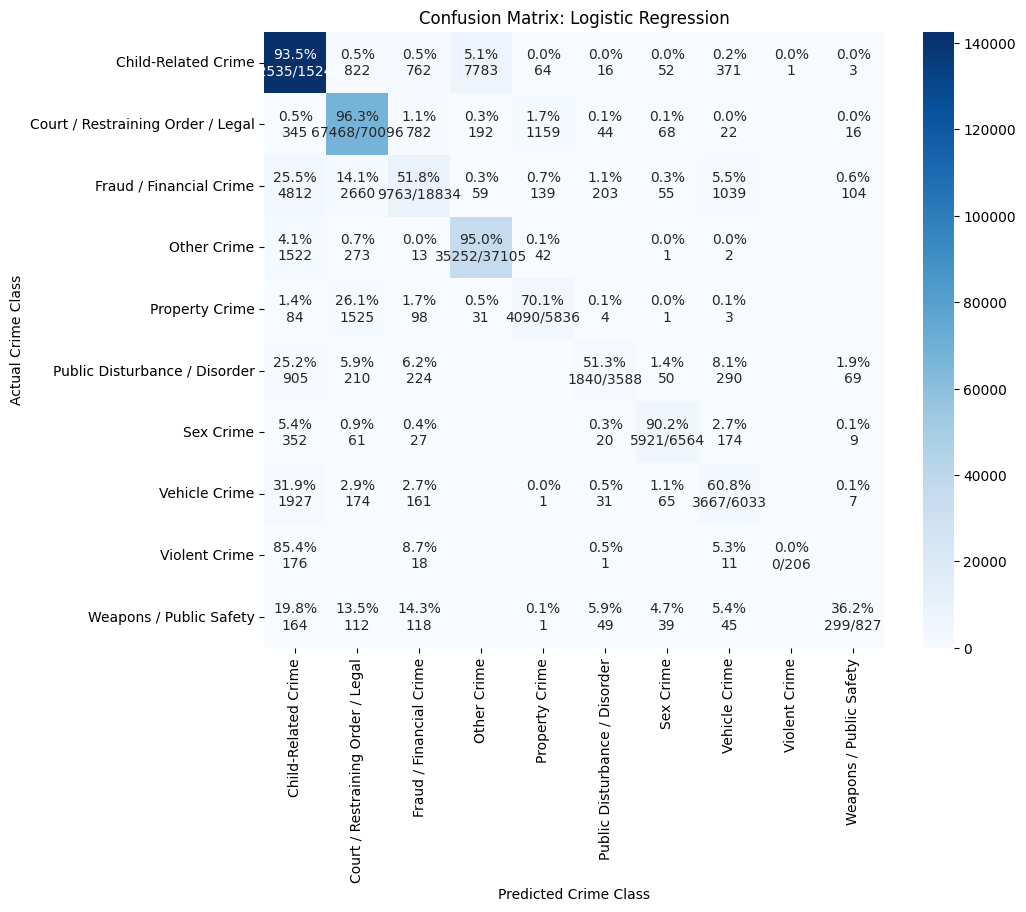

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\4016707288.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


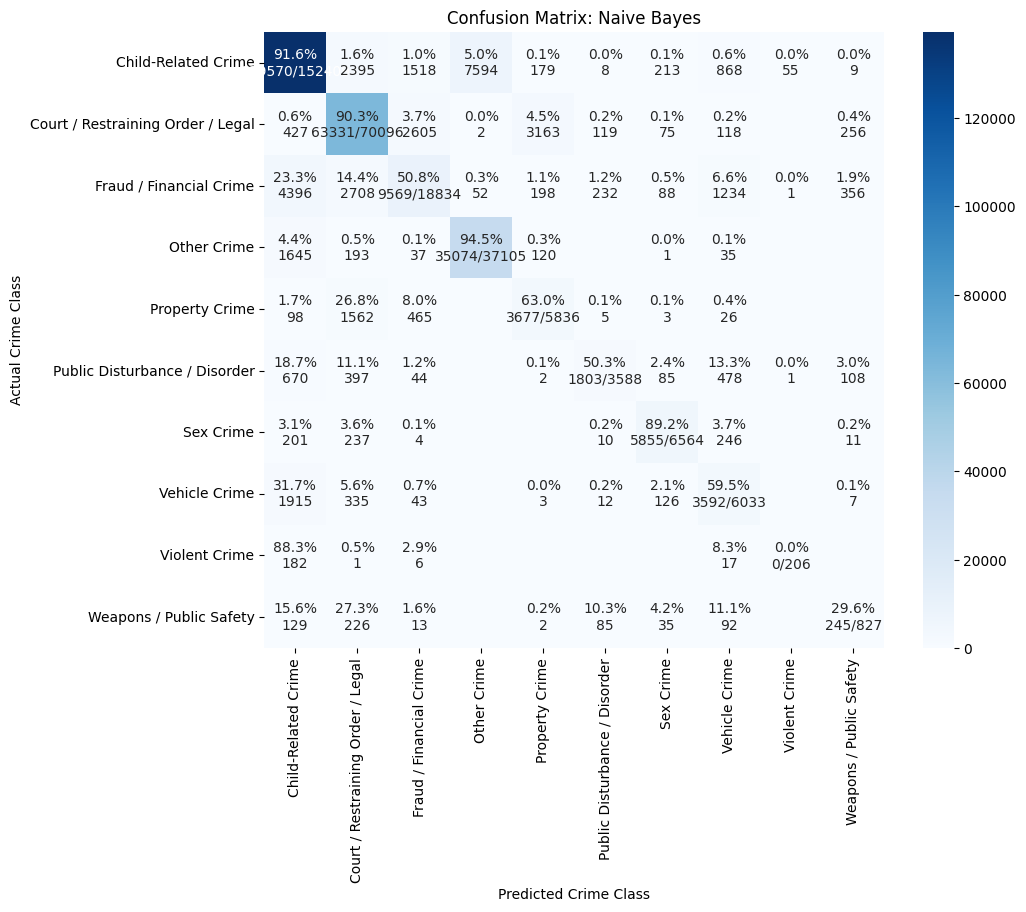

In [52]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_lr, y_pred_test_lr, model_name="Logistic Regression", labels=crime_labels)
plot_crime_matrix(y_test_nb, y_pred_test_nb, model_name="Naive Bayes", labels=crime_labels)

### XGBoost (Processed)

In [42]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# ---- Factorize object columns ----
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_2 = XGBClassifier()

xgb_model_2.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_2.predict(X_train)
y_pred_test = xgb_model_2.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.9190226484129906
Testing Set Accuracy: 0.9144040756489263
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.954706  0.936458  0.945494  356035.000000
1              0.942780  0.976939  0.959555  163391.000000
2              0.850367  0.653387  0.738975   44202.000000
3              0.819761  0.959578  0.884177   86340.000000
4              0.803685  0.792571  0.798089   13595.000000
5              0.879418  0.612895  0.722357    8282.000000
6              0.945656  0.938318  0.941973   15207.000000
7              0.739140  0.738239  0.738689   13944.000000
8              0.976744  0.077778  0.144082     540.000000
9              0.773887  0.666326  0.716090    1957.000000
accuracy       0.919023  0.919023  0.919023       0.919023
macro avg      0.86

Good Increase.

### Validate the results:

We'll apply the samne validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

print("=== XGBoost Stratified K-Fold Validation ===")

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # you can adjust
        max_depth=6,                # default is 6
        learning_rate=0.1,          # default
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    acc = accuracy_score(y_test, xgb_model.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")



=== XGBoost Stratified K-Fold Validation ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.9069


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.9058


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.9026


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.9063


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy = 0.9076
---------------------------------------------------------
K-Fold CV Accuracy Mean: 0.9058399999999999
Std: 0.0017033496411483025
---------------------------------------------------------


Method 2: Use Stratified Shuffle-Split

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== XGBoost Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # adjust as needed
        max_depth=6,                # adjust as needed
        learning_rate=0.1,
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # suitable for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



=== XGBoost Cross-Validation: Stratified Shuffle-Split ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:03:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.9090


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:04:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.9089


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:05:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.9084


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.9085


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy = 0.9092
---------------------------------------------------------
Mean Accuracy:   0.9087993950208626
Std Deviation:  0.0002972641616464367
---------------------------------------------------------


Confusion Matrix:

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_24604\4016707288.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


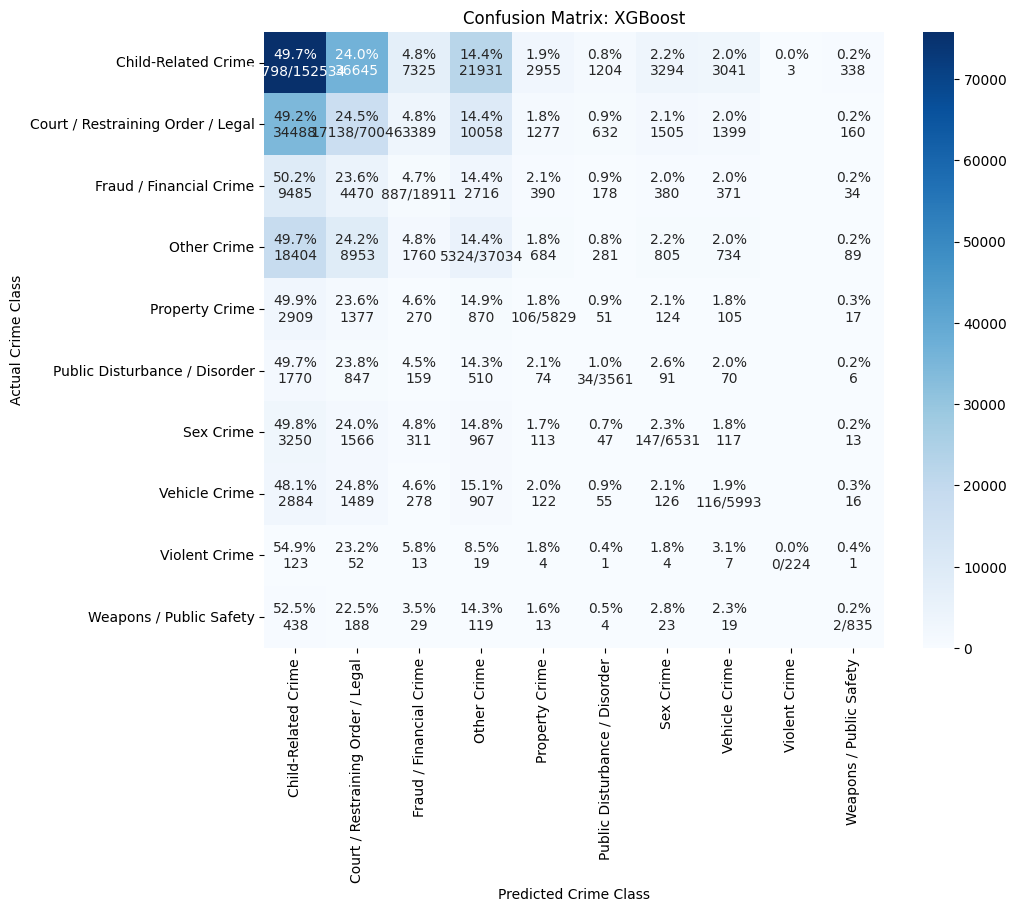

In [46]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test, y_pred_test, model_name="XGBoost", labels=crime_labels)

#### Plot the Complexity vs Error Curve

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_27500\1487863260.py:7: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")


Training XGBoost with max_depth=1 ...
Training XGBoost with max_depth=2 ...
Training XGBoost with max_depth=3 ...
Training XGBoost with max_depth=4 ...
Training XGBoost with max_depth=5 ...
Training XGBoost with max_depth=6 ...
Training XGBoost with max_depth=7 ...
Training XGBoost with max_depth=8 ...
Training XGBoost with max_depth=9 ...
Training XGBoost with max_depth=10 ...
Training XGBoost with max_depth=11 ...
Training XGBoost with max_depth=12 ...
Training XGBoost with max_depth=13 ...
Training XGBoost with max_depth=14 ...
Training XGBoost with max_depth=15 ...
Training XGBoost with max_depth=16 ...
Training XGBoost with max_depth=17 ...
Training XGBoost with max_depth=18 ...
Training XGBoost with max_depth=19 ...
Training XGBoost with max_depth=20 ...
Training XGBoost with max_depth=21 ...
Training XGBoost with max_depth=22 ...
Training XGBoost with max_depth=23 ...
Training XGBoost with max_depth=24 ...
Training XGBoost with max_depth=25 ...
Training XGBoost with max_depth=26

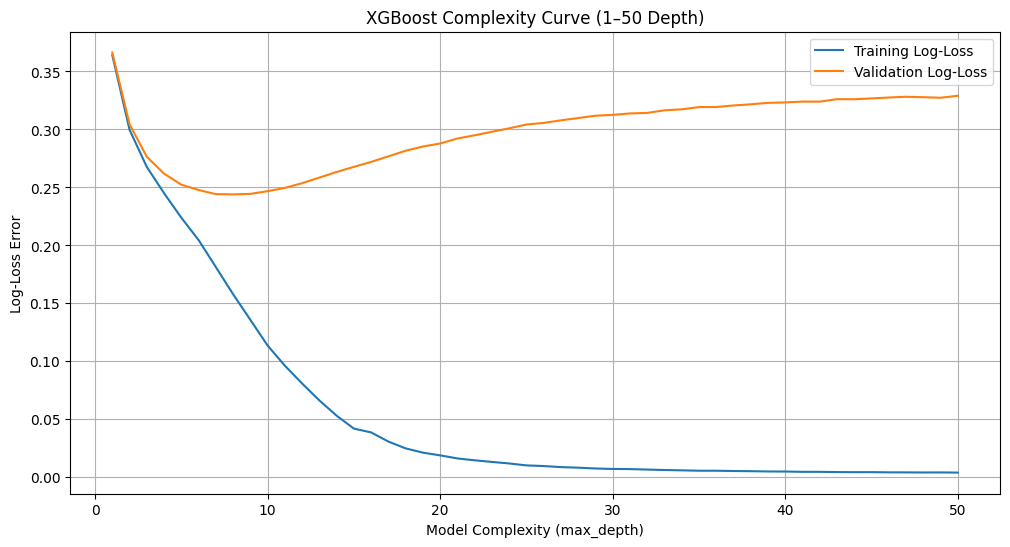

In [ ]:
df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# OPTIONAL: SUBSAMPLE 250K rows for SPEED
# ============================================================

subset = 250_000
# Convert y_train into a Pandas Series with matching indices
y_train_series = pd.Series(y_train, index=X_train.index)

subset = 250_000
if len(X_train) > subset:
    X_train_sub = X_train.sample(subset, random_state=42)
    y_train_sub = y_train_series.loc[X_train_sub.index]
else:
    X_train_sub = X_train
    y_train_sub = y_train_series



# ============================================================
# CREATE CURVE (DEPTH 1 to 50)
# ============================================================

max_depths = range(1, 51)
train_losses = []
test_losses = []

for d in max_depths:
    print(f"Training XGBoost with max_depth={d} ...")

    model = XGBClassifier(
        max_depth=d,
        objective="multi:softprob",
        eval_metric="mlogloss",
        num_class=len(np.unique(y)),
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_sub, y_train_sub)

    # Predict PROBABILITIES
    y_train_prob = model.predict_proba(X_train_sub)
    y_test_prob = model.predict_proba(X_test)

    # Log-loss
    train_losses.append(log_loss(y_train_sub, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))


# ============================================================
# PLOT THE CURVE
# ============================================================

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_losses, label="Training Log-Loss")
plt.plot(max_depths, test_losses, label="Validation Log-Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log-Loss Error")
plt.title("XGBoost Complexity Curve (1–50 Depth)")
plt.legend()
plt.grid(True)
plt.show()

### Evaluate Feature Importance (XGBoost)

In [38]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = xgb_model_2.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


,feature,importance
16,Weapon_Present,0.168830
115,MO_2038,0.106948
7,Vict Sex,0.071647
8,Vict Descent,0.056064
19,MO_1906,0.053005
109,MO_0355,0.043746
70,MO_0344,0.035877
78,MO_0945,0.032207
56,MO_0334,0.027419
91,MO_0337,0.021917


### Visualize the Results

## Category: Deep Learning Models



### Neural Networks: CNN (Proessed)

In [45]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
cnn_model_2 = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = cnn_model_2.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = cnn_model_2.predict(X_train_cnn).argmax(axis=1)
y_pred_test = cnn_model_2.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1888\2039213715.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 148s 8ms/step - accuracy: 0.9005 - loss: 0.3158 - val_accuracy: 0.9093 - val_loss: 0.2750
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 148s 8ms/step - accuracy: 0.9087 - loss: 0.2809 - val_accuracy: 0.9124 - val_loss: 0.2643
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 148s 8ms/step - accuracy: 0.9102 - loss: 0.2743 - val_accuracy: 0.9130 - val_loss: 0.2611
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 150s 8ms/step - accuracy: 0.9113 - loss: 0.2695 - val_accuracy: 0.9136 - val_loss: 0.2595
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 151s 9ms/step - accuracy: 0.9120 - loss: 0.2671 - val_accuracy: 0.9134 - val_loss: 0.2607
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 156s 9ms/step - accuracy: 0.9122 - loss: 0.2649 - val_accuracy: 0.9141 - val_loss: 0.2591
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 153s 9ms/step - accuracy: 0.9129 - loss: 0.2632 - val_accuracy: 0.9137 - val_loss: 0.2585
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 155s 9ms/step - ac

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.9161754274740473
Testing Set Accuracy: 0.9130276154402351
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.955644  0.937891  0.946684  356035.000000
1              0.937342  0.976461  0.956502  163391.000000
2              0.819333  0.648319  0.723863   44202.000000
3              0.820218  0.957054  0.883368   86340.000000
4              0.798189  0.752041  0.774428   13595.000000
5              0.863926  0.540449  0.664934    8282.000000
6              0.932077  0.926744  0.929403   15207.000000
7              0.730837  0.717943  0.724333   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.721889  0.492080  0.585232    1957.000000
accuracy       0.916175  0.916175  0.916175       0.916175
macro avg      0.75

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

#### Perform Validation:

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# Use a smaller subsample if your dataset is very large
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Stratified Shuffle-Split
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)  # fewer splits due to time

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_cnn, y_sub):
    print(f"=== Fold {fold} ===")
    
    X_train, X_test = X_cnn[train_idx], X_cnn[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train
    cnn_model.fit(
        X_train, y_train,
        epochs=5,           # keep low for faster CV
        batch_size=32,
        verbose=0           # silent training for CV
    )

    # Evaluate
    y_pred = cnn_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


=== Fold 1 ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Fold 1 Accuracy: 0.9037
=== Fold 2 ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Fold 2 Accuracy: 0.9048
=== Fold 3 ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Fold 3 Accuracy: 0.9099
---------------------------------------------------------
CV Accuracy Mean: 0.9061222222222223
CV Accuracy Std: 0.0026902200561696506
---------------------------------------------------------


#### Plot the error versus complexity curve.

=== Generating CNN Error vs Complexity Curve ===
Training CNN with 8 filters in first Conv1D layer


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training CNN with 16 filters in first Conv1D layer


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training CNN with 32 filters in first Conv1D layer


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training CNN with 64 filters in first Conv1D layer


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training CNN with 128 filters in first Conv1D layer


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


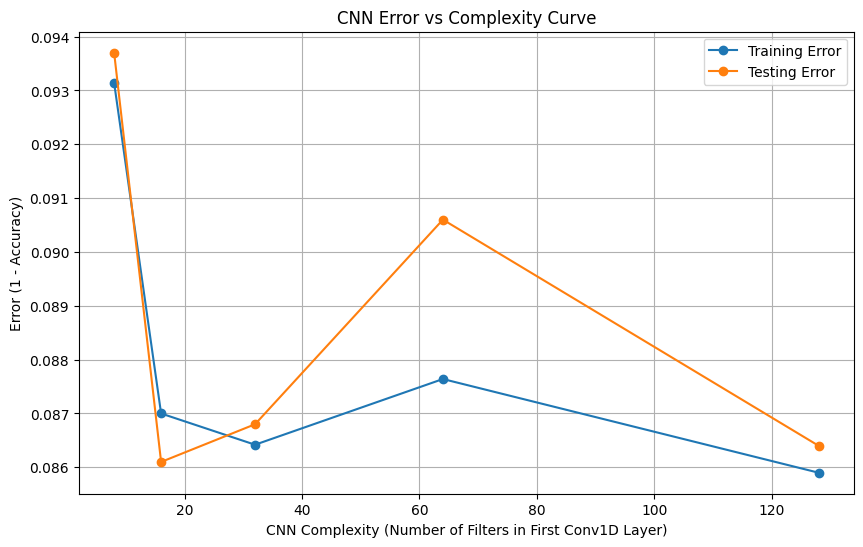

In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Use a smaller subsample for speed
sample_size = 50_000  # adjust as needed
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Complexity levels (number of filters in first Conv1D layer)
complexity_values = [8, 16, 32, 64, 128]

train_errors = []
test_errors = []

print("=== Generating CNN Error vs Complexity Curve ===")

for filters in complexity_values:
    print(f"Training CNN with {filters} filters in first Conv1D layer")

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (fewer epochs for faster evaluation)
    cnn_model.fit(
        X_cnn, y_cat,
        epochs=5,
        batch_size=32,
        verbose=0  # silent training
    )

    # Predict
    y_pred_train = cnn_model.predict(X_cnn).argmax(axis=1)
    y_true = y_sub
    train_err = 1 - accuracy_score(y_true, y_pred_train)

    # Optional: split a small testing subset for speed
    test_idx = np.random.choice(len(X_cnn), size=int(0.2*len(X_cnn)), replace=False)
    X_test_small = X_cnn[test_idx]
    y_test_small = y_sub[test_idx]
    y_test_cat_small = y_cat[test_idx]

    y_pred_test = cnn_model.predict(X_test_small).argmax(axis=1)
    test_err = 1 - accuracy_score(y_test_small, y_pred_test)

    train_errors.append(train_err)
    test_errors.append(test_err)

# ---- Plot ----
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, train_errors, marker='o', label="Training Error")
plt.plot(complexity_values, test_errors, marker='o', label="Testing Error")
plt.xlabel("CNN Complexity (Number of Filters in First Conv1D Layer)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("CNN Error vs Complexity Curve")
plt.legend()
plt.grid(True)
plt.show()


21985/21985 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step
------------------------
Training Loss
0.25288165838259297
------------------------
Testing Loss:
0.2657686539181859
------------------------
:)
------------------------
Accuracy Gap:
0.0033638754740152876
------------------------
Loss Gap:
0.012886995535592916
------------------------


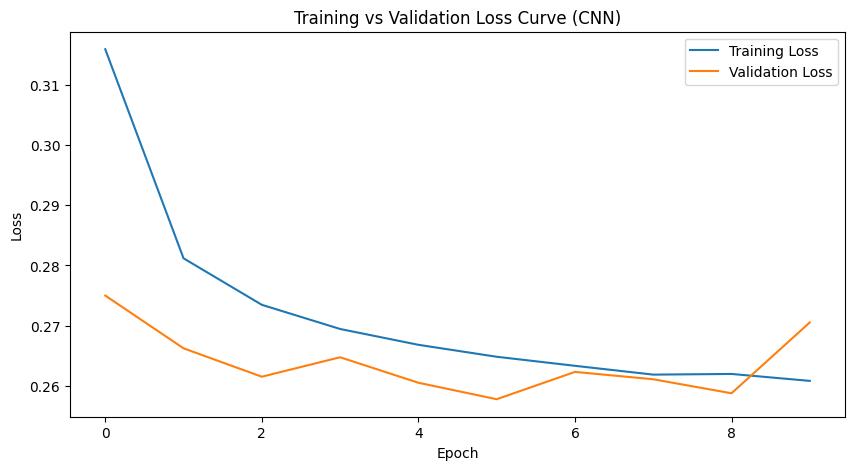

In [37]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# ====== COMPUTE PROBABILITIES ======
train_proba = cnn_model_2.predict(X_train_cnn)
test_proba  = cnn_model_2.predict(X_test_cnn)

# ====== COMPUTE LOG LOSS ======
train_loss = log_loss(y_train, train_proba)
test_loss  = log_loss(y_test,  test_proba)

print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")
print(":)")
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")

# ====== PLOT TRAINING vs VALIDATION LOSS FROM HISTORY ======
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve (CNN)")
plt.legend()
plt.show()


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential m

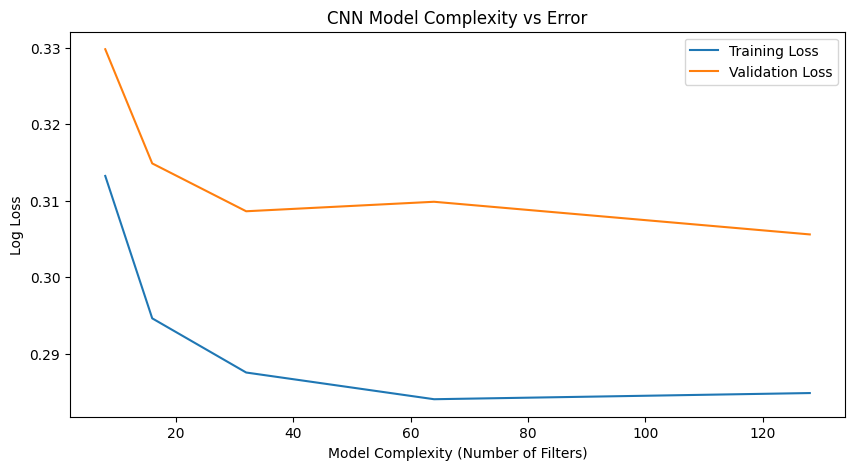

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# ======================================================
# 1. TAKE A SMALL SUBSET TO AVOID HOURS OF TRAINING
# ======================================================
subset = 50000   # Use 50k rows for speed (change if needed)

X_train_sub = X_train_cnn[:subset]
y_train_sub = y_train[:subset]
y_train_sub_cat = y_train_cat[:subset]

X_val_sub = X_test_cnn[:20000]
y_val_sub = y_test[:20000]
y_val_sub_cat = y_test_cat[:20000]

# ======================================================
# 2. DEFINE COMPLEXITY LEVELS (NUMBER OF FILTERS)
# ======================================================
complexities = [8, 16, 32, 64, 128]

train_losses = []
test_losses = []
train_accs = []
test_accs = []

# ======================================================
# 3. LOOP THROUGH MODEL COMPLEXITIES
# ======================================================
for filters in complexities:

    model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu',
               input_shape=(X_train_sub.shape[1], 1)),
        MaxPooling1D(pool_size=2),

        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        Flatten(),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # short training for speed
    model.fit(
        X_train_sub, y_train_sub_cat,
        epochs=3,          # small number for speed
        batch_size=64,
        verbose=0
    )

    # Predictions
    train_proba = model.predict(X_train_sub, verbose=0)
    test_proba  = model.predict(X_val_sub,   verbose=0)

    y_train_pred = np.argmax(train_proba, axis=1)
    y_test_pred  = np.argmax(test_proba, axis=1)

    # Metrics
    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_val_sub,  test_proba))

    train_accs.append(accuracy_score(y_train_sub, y_train_pred))
    test_accs.append(accuracy_score(y_val_sub,  y_test_pred))


# ======================================================
# 4. PLOT COMPLEXITY vs ERROR
# ======================================================
plt.figure(figsize=(10,5))
plt.plot(complexities, train_losses, label="Training Loss")
plt.plot(complexities, test_losses, label="Validation Loss")
plt.xlabel("Model Complexity (Number of Filters)")
plt.ylabel("Log Loss")
plt.title("CNN Model Complexity vs Error")
plt.legend()
plt.show()


### Neural Network: ANN (Processed)

In [34]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,              #Use 10 as a derfault value for epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13460\2866109942.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8944 - loss: 0.3399 - val_accuracy: 0.9095 - val_loss: 0.2757
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9053 - loss: 0.2963 - val_accuracy: 0.9109 - val_loss: 0.2716
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9065 - loss: 0.2893 - val_accuracy: 0.9117 - val_loss: 0.2709
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9074 - loss: 0.2854 - val_accuracy: 0.9125 - val_loss: 0.2660
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9083 - loss: 0.2833 - val_accuracy: 0.9123 - val_loss: 0.2647
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.9088 - loss: 0.2815 - val_accuracy: 0.9134 - val_loss: 0.2629
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9087 - loss: 0.2804 - val_accuracy: 0.9131 - val_loss: 0.2612
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.9142649607032337
Testing Set Accuracy: 0.912341043721683
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.953870  0.937666  0.945699  356035.000000
1              0.938457  0.972189  0.955025  163391.000000
2              0.835677  0.629338  0.717977   44202.000000
3              0.820863  0.951969  0.881568   86340.000000
4              0.762379  0.799559  0.780526   13595.000000
5              0.693587  0.634629  0.662799    8282.000000
6              0.940261  0.913921  0.926904   15207.000000
7              0.741427  0.688468  0.713967   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.679110  0.436893  0.531716    1957.000000
accuracy       0.914265  0.914265  0.914265       0.914265
macro avg      0.736

Validation Time. :)

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# ============================================================
# Optional subsample for speed (same as CNN version)
# ============================================================
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# ============================================================
# Scale features
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# ============================================================
# Stratified Shuffle-Split
# ============================================================
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_scaled, y_sub):
    print(f"=== Fold {fold} ===")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # ============================================================
    # Build ANN model (matching your original architecture)
    # ============================================================
    ann_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    ann_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (silent for CV)
    ann_model.fit(
        X_train, y_train,
        epochs=5,          # reduced for faster CV, same as CNN version
        batch_size=32,
        verbose=0
    )

    # Predict + evaluate
    y_pred = ann_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

# ============================================================
# Summary
# ============================================================
print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


=== Fold 1 ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 1 Accuracy: 0.9046
=== Fold 2 ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 2 Accuracy: 0.9057
=== Fold 3 ===


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 3 Accuracy: 0.9081
---------------------------------------------------------
CV Accuracy Mean: 0.9061444444444443
CV Accuracy Std: 0.0014682651222227819
---------------------------------------------------------


Curve Check.

=== Preparing Data ===
=== Starting Training Loop (Subsample: 250000) ===
Training model with 10 neurons...


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 50 neurons...
Training model with 150 neurons...
Training model with 400 neurons...
Training model with 800 neurons...


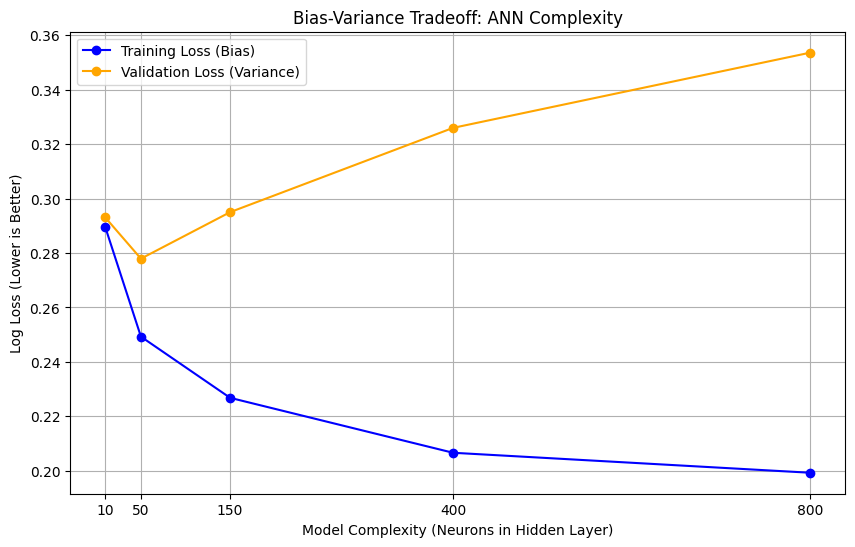

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ============================================================
# 1. Prepare Data (Updated for 250k)
# ============================================================
print("=== Preparing Data ===")
# Ensure we don't sample more than we have
sample_size = min(250_000, len(X))

# Assuming X is a DataFrame (based on your .sample code)
X_sub = X.sample(n=sample_size, random_state=42)
y_sub = y[X_sub.index] # Align y with X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_cat, test_size=0.3, random_state=42, stratify=y_sub
)

# ============================================================
# 2. Complexity levels (Wider Range)
# ============================================================
# We go from very simple (10) to very complex (800) to force the curve
complexity_levels = [10, 50, 150, 400, 800]

train_losses = []
val_losses = []

print(f"=== Starting Training Loop (Subsample: {sample_size}) ===")

# ============================================================
# 3. Train ANN for each complexity level
# ============================================================
for units in complexity_levels:
    print(f"Training model with {units} neurons...")

    model = Sequential([
        # INCREASED COMPLEXITY:
        # We use a single massive layer.
        # CRITICAL: We REMOVED Dropout to allow overfitting.
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # INCREASED EPOCHS:
    # We need enough time for the big models to memorize the noise.
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Increased from 5 to 20
        batch_size=64, # Slightly larger batch for speed
        validation_data=(X_val, y_val),
        verbose=0
    )

    # Store final epoch losses
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

# ============================================================
# 4. Plot Error vs Complexity
# ============================================================
plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(complexity_levels, train_losses, marker='o', label='Training Loss (Bias)', color='blue')
plt.plot(complexity_levels, val_losses, marker='o', label='Validation Loss (Variance)', color='orange')

plt.title("Bias-Variance Tradeoff: ANN Complexity")
plt.xlabel("Model Complexity (Neurons in Hidden Layer)")
plt.ylabel("Log Loss (Lower is Better)")
plt.xticks(complexity_levels) # Show exact x-axis values
plt.grid(True)
plt.legend()

plt.show()

### Part A: (Shorlisting Most Promising Models)

#### Now, let's select the most promising models, we will ignore the rest.

We're choosing model shorlisters from two “families” of models:

Tree-based family (ML Models):
- Decision Tree (DT)
- Random Forest (RF)
- XGBoost (XGB)

Neural network family (DL Models):
- ANN
- CNN

Of the 5 models present, XGBoost and ANN proved the most promising, as their complexity vs error, testing results, and SD of validation scores all lie within a highly satifying range. These 2 will be shortlisted as most promising.

The question now though is to select a 3rd model to shortlist. As CNN is stricly better than ANN due to CNN being primarily used for images, spatial structures, and grid-like data, ANN will be the only succesor of its famnily.

The question now is to decide which tree model should advance formward. 

While the RF model did outperform DT slightly, there are some flaws:
- RF has far higher complexity
- DT gives similar accuracy but much lower computational cost
- You invoked Occam’s Razor → simpler model with similar performance is preferred
- DT also gives feature importance and full interpretability

In the context of the Occam's Razor principle, simplicity is often the safer alternative, as unwated complexitu may include unwanted hastle. This is proved further when you factor in the training time an RF model takes. The DT model only requires a few minutes, while an RF model could take up to 1 hour to fully train on heavy datasets. 

Since the difference is neglectable, we've opted to leave behind the RF model, and instead take its pre-form, the DT model instead.


📌 Decision Tree

- Train Acc: 0.9819
- Test Acc: 0.8776 → large generalisation gap
- Train F1: 0.9892
- Test F1: 0.6663 → VERY large drop
- SD: 0.00065 → extremely stable

Interpretation:
- DT overfits heavily
- Stability is great, but F1 is weak
- Valid as an interpretable baseline
- Not the winner among strong models

📌 XGBoost

- Train Acc: 0.9226
- Test Acc: 0.9167 → tiny generalisation gap
- Train F1: 0.7827
- Test F1: 0.7359 → also stable
- CV SD: 0.00019 → the most stable model
- Highest CV mean: 0.9111

Interpretation:
- Best generalisation
- Best CV score
- Lowest variance
- Best balance of train-test match
- Best F1 of the three

Clearly the best tree-based model and likely the best overall model.

📌 ANN

- Train Acc: 0.9141
- Test Acc: 0.9122 → tiny generalisation gap
- Train F1: 0.7097
- Test F1: 0.7036
- CV SD: 0.00146 → more variance than XGB, but still acceptable

Interpretation:
- Performs nearly as well as XGB
- Much simpler than XGB (depending on architecture)
- Good generalisation
- Lower F1 than XGB, but still strong

Clear winner of the neural-based family.

As such, these 3 models will be chosen and will be proceeded forward for Part B training.

## Part B - Parameters

### Now, let's implement Hyperparameter Tuning:

This will take a while as well.

### Decision Tree (Processed & Parameters)

In [42]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# 🔥 FAST HYPERPARAMETER TUNING — SUCCESSIVE HALVING
# ============================================================

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

halving_search = HalvingGridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    factor=3,      # aggressively eliminates bad configs
    resource="n_samples",
    max_resources="auto",
    n_jobs=-1,
    verbose=1
)

halving_search.fit(X_train, y_train)

print("Best Parameters:", halving_search.best_params_)

# Best model
dt_model_4 = halving_search.best_estimator_

# ============================================================
# Prediction and Evaluation
# ============================================================

# Predict
y_pred = dt_model_4.predict(X_test)
y_pred_train = dt_model_4.predict(X_train)

# Eval reports
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 26055
max_resources_: 703493
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 54
n_resources: 26055
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 1
n_candidates: 18
n_resources: 78165
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 6
n_resources: 234495
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 703485
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.8912043190195211
Testing Set Accuracy: 0.8901253076305647
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.929658  0.927457  0.928556  356035.000000
1              0.916610  0.959116  0.937382  163391.000000
2              0.679806  0.581331  0.626724   44202.000000
3              0.821368  0.949977  0.881004   86340.000000
4              0.671077  0.761015  0.713222   13595.000000
5              0.936715  0.450374  0.608284    8282.000000
6              0.977356  0.877030  0.924479   15207.000000
7              0.735199  0.309022  0.435143   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.778934  0.306081  0.439472    1957.000000
accuracy       0.891204  0.891204  0.891204       0.891204
macro avg      0.74

Validation.

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ============================================================
# Use the SAME BEST PARAMETERS from HalvingGridSearch
# ============================================================
best_params = halving_search.best_params_
print("Using Best Params for CV:", best_params)

# ============================================================
# Stratified Shuffle-Split (same dataset you prepared earlier)
# ============================================================

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    print(f"\n=== Fold {fold} ===")

    X_train_cv = X.iloc[train_idx]
    X_test_cv  = X.iloc[test_idx]
    y_train_cv = y[train_idx]
    y_test_cv  = y[test_idx]

    # Build model with best hyperparameters
    dt_cv = DecisionTreeClassifier(**best_params)

    # Train
    dt_cv.fit(X_train_cv, y_train_cv)

    # Predict & evaluate
    y_pred_cv = dt_cv.predict(X_test_cv)
    acc = accuracy_score(y_test_cv, y_pred_cv)

    print(f"Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

# ============================================================
# Summary
# ============================================================
print("\n---------------------------------------------------------")
print("Stratified Shuffle-Split Mean Accuracy:", np.mean(accuracies))
print("Std Deviation:", np.std(accuracies))
print("---------------------------------------------------------")


Using Best Params for CV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

=== Fold 1 ===
Accuracy: 0.8885

=== Fold 2 ===
Accuracy: 0.8903

=== Fold 3 ===
Accuracy: 0.8897

=== Fold 4 ===
Accuracy: 0.8906

=== Fold 5 ===
Accuracy: 0.8899

---------------------------------------------------------
Stratified Shuffle-Split Mean Accuracy: 0.8897962838891136
Std Deviation: 0.0007302756779370842
---------------------------------------------------------


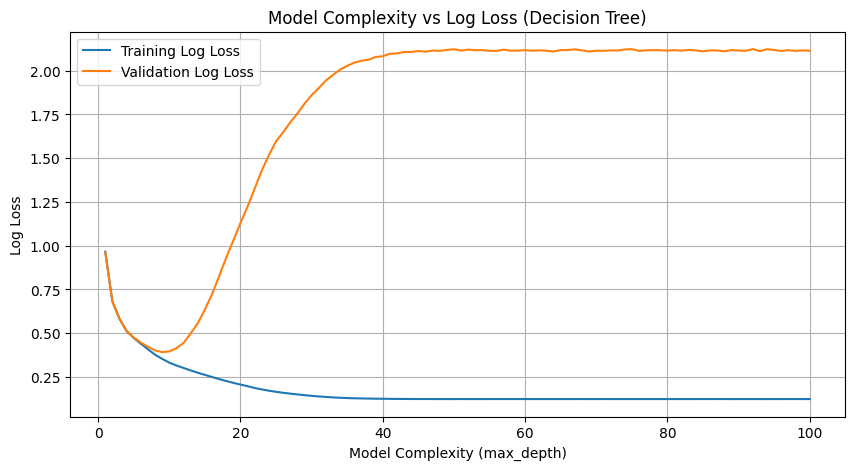

In [46]:
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------------------------------
# Convert y to Series so that indexing works cleanly
# ----------------------------------------------------
y_train = pd.Series(y_train)
y_test  = pd.Series(y_test)

# ----------------------------------------------------
# Reset indices of X and y together
# ----------------------------------------------------
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# ----------------------------------------------------
# Subsample 250,000 rows for efficient complexity curve
# ----------------------------------------------------
sample_size = min(250_000, len(X_train), len(X_test))

X_train_sub = X_train.sample(sample_size, random_state=42)
y_train_sub = y_train.loc[X_train_sub.index]

X_test_sub = X_test.sample(sample_size, random_state=42)
y_test_sub = y_test.loc[X_test_sub.index]

# ----------------------------------------------------
# Complexity curve (log-loss + accuracy)
# ----------------------------------------------------
depths = range(1, 101, 1)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

best_params = halving_search.best_params_

for d in depths:
    model = DecisionTreeClassifier(
        criterion=best_params['criterion'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split=best_params['min_samples_split'],
        max_depth=d
    )

    model.fit(X_train_sub, y_train_sub)

    # Predict probabilities for log-loss
    train_proba = model.predict_proba(X_train_sub)
    test_proba  = model.predict_proba(X_test_sub)

    train_losses_curve.append(log_loss(y_train_sub, train_proba))
    test_losses_curve.append(log_loss(y_test_sub, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_sub)
    y_test_pred  = model.predict(X_test_sub)
    train_acc_curve.append(accuracy_score(y_train_sub, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_sub, y_test_pred))


# ----------------------------------------------------
# Plot Log Loss Curve
# ----------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Log Loss")
plt.plot(depths, test_losses_curve, label="Validation Log Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Log Loss (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()


In [48]:
from sklearn.metrics import log_loss

train_loss = log_loss(y_train, dt_model_4.predict_proba(X_train))
test_loss  = log_loss(y_test,  dt_model_4.predict_proba(X_test))
print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Error:")
print(test_loss)
print("------------------------")
print(":)")
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")


------------------------
Training Loss
0.3343433551990626
------------------------
Testing Error:
0.3655590139101725
------------------------
:)
------------------------
Accuracy Gap:
0.0010790113889563857
------------------------
Loss Gap:
0.031215658711109873
------------------------


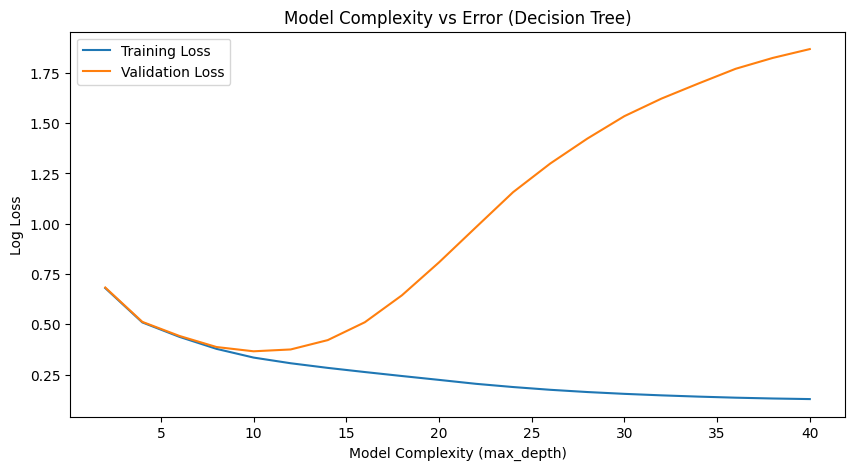

In [ ]:
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

# Use best hyperparameters, vary only depth
best_params = halving_search.best_params_

for d in depths:
    loss_model = DecisionTreeClassifier(
        criterion=best_params['criterion'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split=best_params['min_samples_split'],
        max_depth=d
    )

    loss_model.fit(X_train, y_train)

    # Loss
    train_proba = loss_model.predict_proba(X_train)
    test_proba  = loss_model.predict_proba(X_test)
    train_losses_curve.append(log_loss(y_train, train_proba)) 
    test_losses_curve.append(log_loss(y_test, test_proba))

    # Accuracy
    y_train_pred = loss_model.predict(X_train)
    y_test_pred  = loss_model.predict(X_test)
    train_acc_curve.append(accuracy_score(y_train, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()


### XGBoost (Processed & Parameters)

In [32]:
print("=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===")

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# ============================================================
# PREPROCESSING (same as before)
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
# Keep y as a pandas Series instead of numpy array
y = pd.Series(pd.factorize(df_model_2["Crime_Class"])[0])


for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# TINY SUBSAMPLE FOR FAST TUNING
# ============================================================

tune_size = 10000
X_tune = X_train.sample(tune_size, random_state=42)
y_tune = y_train[X_tune.index]

print(f"Tuning using {len(X_tune):,} rows")

# ============================================================
# FAST XGBOOST RANDOMIZED SEARCH
# ============================================================

xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": randint(4, 10),
    "learning_rate": uniform(0.03, 0.2),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "n_estimators": randint(150, 400)
}

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=15,        # FAST
    cv=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_tune, y_tune)

print("\nBest Params:", search.best_params_)

# ============================================================
# TRAIN FINAL MODEL ON FULL DATASET
# ============================================================

xgb_final = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

xgb_final.fit(X_train, y_train)

# ============================================================
# EVALUATION
# ============================================================

y_pred_train = xgb_final.predict(X_train)
y_pred_test = xgb_final.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("\nTEST REPORT")
print(classification_report(y_test, y_pred_test))


=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===
Tuning using 10,000 rows
Fitting 2 folds for each of 15 candidates, totalling 30 fits

Best Params: {'colsample_bytree': np.float64(0.7713480415791243), 'learning_rate': np.float64(0.05818484499495253), 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 238, 'subsample': np.float64(0.9934434683002586)}
Training Accuracy: 0.9191918043249897
Testing Accuracy: 0.9140524978606823

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    356035
           1       0.94      0.98      0.96    163391
           2       0.86      0.65      0.74     44202
           3       0.82      0.96      0.88     86340
           4       0.81      0.80      0.80     13595
           5       0.89      0.61      0.72      8282
           6       0.95      0.94      0.94     15207
           7       0.74      0.73      0.74     13944
           8       0.98      0.07      0.14       540
           9 

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

print("=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===\n")

# ------------------------------------------------------------
# Use your tuned parameters
# ------------------------------------------------------------
best_params = search.best_params_
print("Using Best Params:", best_params, "\n")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # --------------------------------------------------------
    # XGBoost model with best params
    # --------------------------------------------------------
    xgb_cv = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        **best_params
    )

    xgb_cv.fit(X_train_cv, y_train_cv)

    # Predict
    y_pred = xgb_cv.predict(X_test_cv)

    # Accuracy
    acc = accuracy_score(y_test_cv, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===

Using Best Params: {'colsample_bytree': np.float64(0.7713480415791243), 'learning_rate': np.float64(0.05818484499495253), 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 238, 'subsample': np.float64(0.9934434683002586)} 

Fold 1: Accuracy = 0.9142
Fold 2: Accuracy = 0.9146
Fold 3: Accuracy = 0.9138
Fold 4: Accuracy = 0.9143
Fold 5: Accuracy = 0.9148
---------------------------------------------------------
Mean Accuracy:   0.9143390669258171
Std Deviation:  0.0003418856333002492
---------------------------------------------------------


Subsampling 250000 rows...
Testing max_depth = 1...
Testing max_depth = 6...
Testing max_depth = 11...
Testing max_depth = 16...
Testing max_depth = 21...
Testing max_depth = 26...
Testing max_depth = 31...
Testing max_depth = 36...
Testing max_depth = 41...
Testing max_depth = 46...


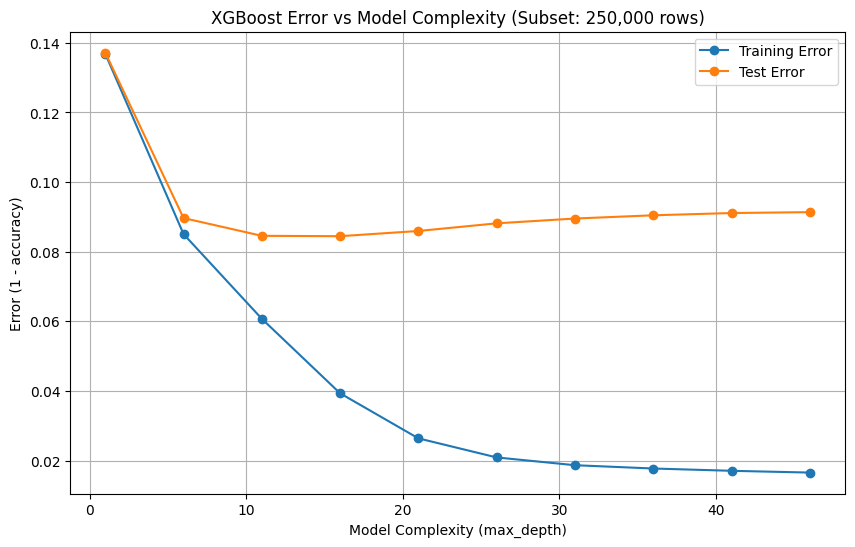

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# -------------------------------
# 1. Use a subset for speed
# -------------------------------
subset_size = 250_000  # <--- UPDATED to 250k
print(f"Subsampling {subset_size} rows...")
X_sub = X.sample(subset_size, random_state=42)
y_sub = y[X_sub.index] # Ensure target aligns with sampled X

# -------------------------------
# 2. Complexity range (max_depth)
# -------------------------------
# Range 1 to 50 with step 5 (1, 6, 11... 46, 51)
depth_values = range(1, 51, 5) 
train_errors = []
test_errors = []

# Base tuned params (Make sure 'search' is defined or replace this line!)
base_params = search.best_params_.copy()

# -------------------------------
# 3. Stratified Shuffle-Split
# -------------------------------
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

for depth in depth_values:
    fold_train_errors = []
    fold_test_errors = []
    print(f"Testing max_depth = {depth}...")

    for train_idx, test_idx in sss.split(X_sub, y_sub):
        X_train_cv, X_test_cv = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
        y_train_cv, y_test_cv = y_sub.iloc[train_idx], y_sub.iloc[test_idx]

        # Update params for this specific loop
        params = base_params.copy()
        params["max_depth"] = depth

        model = XGBClassifier(
            objective="multi:softmax",
            num_class=len(np.unique(y_sub)),
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1,
            **params
        )

        model.fit(X_train_cv, y_train_cv)

        # Predictions
        y_pred_train = model.predict(X_train_cv)
        y_pred_test  = model.predict(X_test_cv)

        # Calculate Error (1 - Accuracy)
        fold_train_errors.append(1 - accuracy_score(y_train_cv, y_pred_train))
        fold_test_errors.append(1 - accuracy_score(y_test_cv, y_pred_test))

    # Average over folds
    train_errors.append(np.mean(fold_train_errors))
    test_errors.append(np.mean(fold_test_errors))

# -------------------------------
# 4. Plot
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_errors, marker='o', label="Training Error")
plt.plot(depth_values, test_errors, marker='o', label="Test Error")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - accuracy)")
plt.title(f"XGBoost Error vs Model Complexity (Subset: {subset_size:,} rows)")
plt.legend()
plt.grid(True)
plt.show()

### ANN (Hyperparamters)

Perform the Shuffle-Split Validation:

*Note, if it shows error X_train_scaled is not defined, run the top ANN (Processed) model first.

In [35]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# ============================================================
# 1. Define a lightweight search space
# ============================================================

param_space = {
    "lr": [1e-3, 3e-4, 1e-4],
    "hidden_1": [64, 96, 128],
    "hidden_2": [32, 48, 64],
    "dropout": [0.2, 0.3, 0.4],
    "batch_size": [32, 64, 128]
}


# ============================================================
# 2. Function to build a model from hyperparameters
# ============================================================

def build_model(params):
    model = Sequential([
        Dense(params["hidden_1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(params["dropout"]),

        Dense(params["hidden_2"], activation='relu'),
        Dropout(params["dropout"]),

        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=params["lr"]),
        metrics=['accuracy']
    )
    return model


# ============================================================
# 3. LIGHTWEIGHT BEST PARAMS SEARCH
#    (Random sampling + short training + early stopping)
# ============================================================

def sample_params():
    return {
        "lr": random.choice(param_space["lr"]),
        "hidden_1": random.choice(param_space["hidden_1"]),
        "hidden_2": random.choice(param_space["hidden_2"]),
        "dropout": random.choice(param_space["dropout"]),
        "batch_size": random.choice(param_space["batch_size"])
    }

search_results = []
N_SEARCH = 4   # Only 4 trials → FAST & LIGHT, it strikes a decent balance; or set to a smaller value if time is a concern (Such as 3), or to a a larger value if you have more time (Such as 5-10)

print("\n========== STARTING BEST PARAMS SEARCH ==========\n")

for i in range(N_SEARCH):
    params = sample_params()
    print(f"Trial {i+1}/{N_SEARCH}: {params}")

    model = build_model(params)

    es = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # SHORT training for search only
    history = model.fit(
        X_train_scaled,
        y_train_cat,
        epochs=8,
        batch_size=params["batch_size"],
        validation_split=0.2,
        verbose=0,
        callbacks=[es]
    )

    val_acc = max(history.history["val_accuracy"])
    search_results.append((val_acc, params))

    print(f" → Best Val Accuracy: {val_acc:.4f}\n")

# ============================================================
# 4. Select best params
# ============================================================

best_val, best_params = max(search_results, key=lambda x: x[0])
print("\n========== BEST PARAMS FOUND ==========")
print(best_params)
print("Best Validation Accuracy:", best_val)


# ============================================================
# 5. Train FINAL MODEL with best params
# ============================================================

print("\n========== TRAINING FINAL MODEL ==========\n")

final_model = build_model(best_params)

es_final = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_final = final_model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=25,
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1,
    callbacks=[es_final]
)


# ============================================================
# 6. Evaluate
# ============================================================

y_pred_train = final_model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = final_model.predict(X_test_scaled).argmax(axis=1)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\n===== TRAINING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose())

print("\n===== TESTING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose())



========== STARTING BEST PARAMS SEARCH ==========

Trial 1/4: {'lr': 0.0003, 'hidden_1': 128, 'hidden_2': 32, 'dropout': 0.4, 'batch_size': 64}


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 → Best Val Accuracy: 0.9119

Trial 2/4: {'lr': 0.0003, 'hidden_1': 128, 'hidden_2': 64, 'dropout': 0.4, 'batch_size': 64}
 → Best Val Accuracy: 0.9131

Trial 3/4: {'lr': 0.0003, 'hidden_1': 64, 'hidden_2': 32, 'dropout': 0.3, 'batch_size': 128}
 → Best Val Accuracy: 0.9108

Trial 4/4: {'lr': 0.001, 'hidden_1': 96, 'hidden_2': 48, 'dropout': 0.4, 'batch_size': 32}
 → Best Val Accuracy: 0.9117


========== BEST PARAMS FOUND ==========
{'lr': 0.0003, 'hidden_1': 128, 'hidden_2': 64, 'dropout': 0.4, 'batch_size': 64}
Best Validation Accuracy: 0.9131194949150085

========== TRAINING FINAL MODEL ==========

Epoch 1/25
8794/8794 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8664 - loss: 0.4442 - val_accuracy: 0.9040 - val_loss: 0.3000
Epoch 2/25
8794/8794 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8983 - loss: 0.3272 - val_accuracy: 0.9089 - val_loss: 0.2813
Epoch 3/25
8794/8794 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9026 - loss: 0.3084 - val_accuracy: 0.9105 - val_loss: 0.27

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

              precision    recall  f1-score        support
0              0.958515  0.935138  0.946682  356035.000000
1              0.943622  0.970084  0.956670  163391.000000
2              0.815083  0.657753  0.728015   44202.000000
3              0.820212  0.954482  0.882268   86340.000000
4              0.762372  0.805664  0.783420   13595.000000
5              0.798343  0.581744  0.673046    8282.000000
6              0.951097  0.911883  0.931077   15207.000000
7              0.680390  0.751434  0.714149   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.601096  0.504343  0.548486    1957.000000
accuracy       0.915477  0.915477  0.915477       0.915477
macro avg      0.733073  0.707253  0.716381  703493.000000
weighted avg   0.915990  0.915477  0.914200  703493.000000

===== TESTING REPORT =====
              precision    recall  f1-score        support
0              0.957541  0.933856  0.945550  152409.000000
1              0.941329  0.9

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [36]:
# ============================================================
#                📌 FULL ANN PIPELINE 
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================
# PREPROCESSING
# ============================================================

df_model_2 = df_new.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime → int64
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# Convert lists → strings
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# BEST PARAMS (From your search)
# ============================================================
best_params = {
    "layer1": 128,
    "layer2": 64,
    "layer3": 32,
    "dropout": 0.3,
    "batch_size": 32,
    "epochs": 10,       # base training
    "lr": 0.001         # default Adam LR
}

# ============================================================
# MODEL BUILDER FUNCTION
# ============================================================

def build_ann():
    model = Sequential([
        Dense(best_params["layer1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer2"], activation='relu'),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer3"], activation='relu'),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# ============================================================
# TRAIN FINAL MODEL
# ============================================================

model = build_ann()

history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1
)

# Predict
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("\nTRAIN REPORT")
print(pd.DataFrame.from_dict(classification_report(y_train, y_pred_train, output_dict=True)).transpose())

print("\nTEST REPORT")
print(pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).transpose())

# ============================================================
# SHUFFLE-SPLIT CROSS VALIDATION (FAST + MEMORY EFFICIENT)
# ============================================================

def ann_shuffle_split_cv(n_splits=5):

    ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    accuracies = []

    fold = 1
    for train_idx, val_idx in ss.split(X_train_scaled):

        print(f"\n===== ShuffleSplit Fold {fold}/{n_splits} =====")

        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train_cat[train_idx], y_train_cat[val_idx]

        model_cv = build_ann()

        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        model_cv.fit(
            X_tr, y_tr,
            epochs=12,  # small for speed
            batch_size=best_params["batch_size"],
            validation_data=(X_val, y_val),
            verbose=0,
            callbacks=[es]
        )

        loss, acc = model_cv.evaluate(X_val, y_val, verbose=0)
        print(f"Fold Accuracy: {acc:.4f}")

        accuracies.append(acc)
        fold += 1

    accuracies = np.array(accuracies)
    print("\n========== SHUFFLE SPLIT SUMMARY ==========")
    print("Accuracies:", accuracies)
    print("Mean CV Accuracy:", accuracies.mean())
    print("Std Deviation:", accuracies.std())
    print("============================================")

    return accuracies.mean(), accuracies.std()

# Run CV
cv_mean, cv_sd = ann_shuffle_split_cv()


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_13460\1704595787.py:26: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.8946 - loss: 0.3395 - val_accuracy: 0.9102 - val_loss: 0.2777
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9052 - loss: 0.2964 - val_accuracy: 0.9105 - val_loss: 0.2694
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9070 - loss: 0.2884 - val_accuracy: 0.9123 - val_loss: 0.2648
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 87s 5ms/step - accuracy: 0.9075 - loss: 0.2847 - val_accuracy: 0.9129 - val_loss: 0.2644
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9082 - loss: 0.2824 - val_accuracy: 0.9128 - val_loss: 0.2644
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.9088 - loss: 0.2808 - val_accuracy: 0.9136 - val_loss: 0.2627
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9089 - loss: 0.2795 - val_accuracy: 0.9137 - val_loss: 0.2616
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

              precision    recall  f1-score        support
0              0.960338  0.933206  0.946578  356035.000000
1              0.941791  0.971118  0.956230  163391.000000
2              0.820569  0.651803  0.726514   44202.000000
3              0.815131  0.961107  0.882121   86340.000000
4              0.777277  0.786024  0.781626   13595.000000
5              0.696008  0.635837  0.664563    8282.000000
6              0.927079  0.924640  0.925858   15207.000000
7              0.708185  0.727840  0.717878   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.677837  0.454778  0.544343    1957.000000
accuracy       0.915106  0.915106  0.915106       0.915106
macro avg      0.732422  0.704635  0.714571  703493.000000
weighted avg   0.915538  0.915106  0.913747  703493.000000

TEST REPORT
              precision    recall  f1-score        support
0              0.959310  0.932012  0.945464  152409.000000
1              0.939786  0.970127  0.954716

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Fold Accuracy: 0.9127

===== ShuffleSplit Fold 2/5 =====
Fold Accuracy: 0.9122

===== ShuffleSplit Fold 3/5 =====
Fold Accuracy: 0.9138

===== ShuffleSplit Fold 4/5 =====
Fold Accuracy: 0.9136

===== ShuffleSplit Fold 5/5 =====
Fold Accuracy: 0.9122

========== SHUFFLE SPLIT SUMMARY ==========
Accuracies: [0.91272146 0.91222399 0.91384447 0.91358858 0.91220266]
Mean CV Accuracy: 0.9129162311553956
Std Deviation: 0.0006841046772073791
